In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import scipy.io.wavfile as wav
from scipy.signal import spectrogram

import os

import cv2

from sklearn.decomposition import PCA

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.preprocessing import LabelEncoder

import random

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Box plots

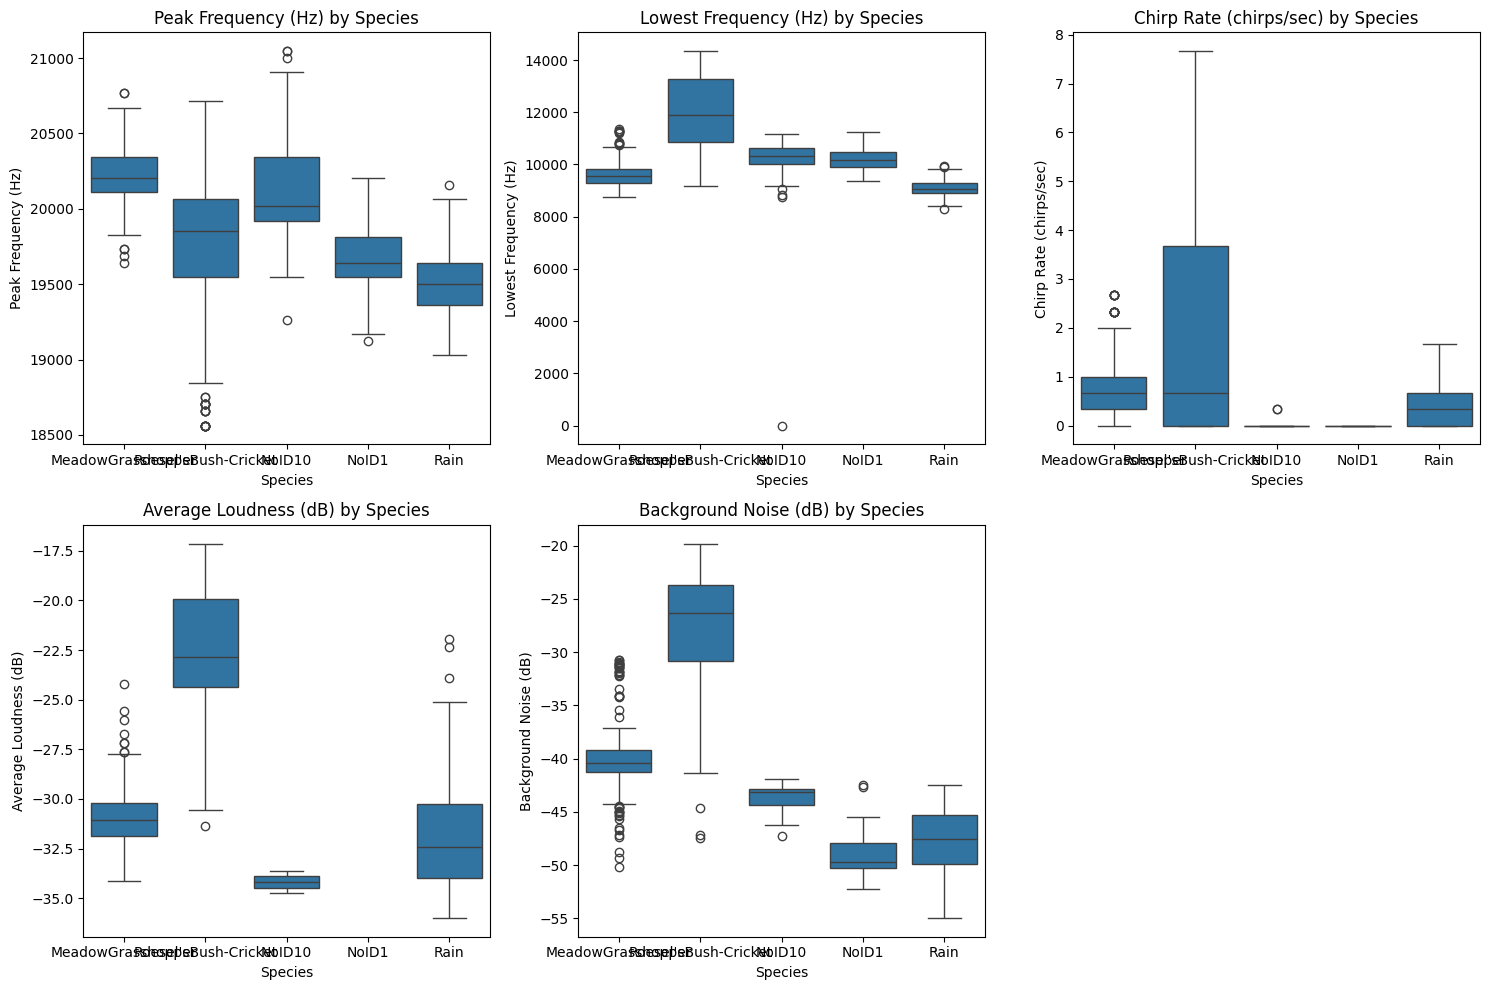

In [3]:
data = pd.read_csv('chirp-analysis-results.csv')

# Set the size of the plot window
plt.figure(figsize=(15, 10))

# Create boxplots for each feature
features = ['Peak Frequency (Hz)', 'Lowest Frequency (Hz)', 'Chirp Rate (chirps/sec)', 'Average Loudness (dB)', 'Background Noise (dB)']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # rows, columns
    sns.boxplot(data=data, x='Species', y=feature)
    plt.title(f'{feature} by Species')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Scatter plots

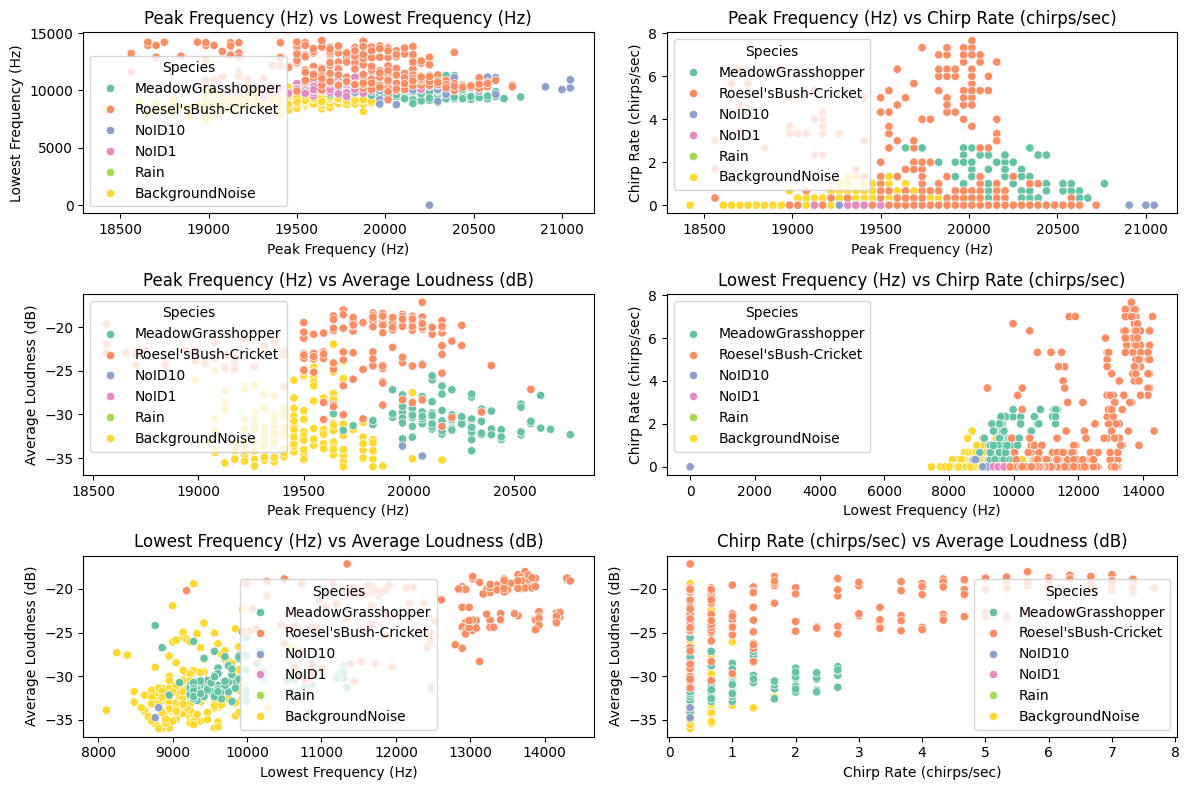

In [37]:
data = pd.read_csv('chirp-analysis-results.csv')

features = ['Peak Frequency (Hz)', 'Lowest Frequency (Hz)', 'Chirp Rate (chirps/sec)', 'Average Loudness (dB)']

plt.figure(figsize=(12, 8)) 

plotIdx = 1  
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:  
            plt.subplot(3, 2, plotIdx) 
            sns.scatterplot(data=data, x=feature1, y=feature2, hue='Species', palette='Set2')
            plt.title(f'{feature1} vs {feature2}')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plotIdx += 1  

plt.tight_layout()
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_11396\763439771.py:18: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Student\AppData\Local\Temp\ipykernel_11396\763439771.py:18: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Student\AppData\Local\Temp\ipykernel_11396\763439771.py:18: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Student\AppData\Local\Temp\ipykernel_11396\763439771.py:18: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Student\AppData\Local\Temp\ipykernel_11396\763439771.py:18: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=Fa

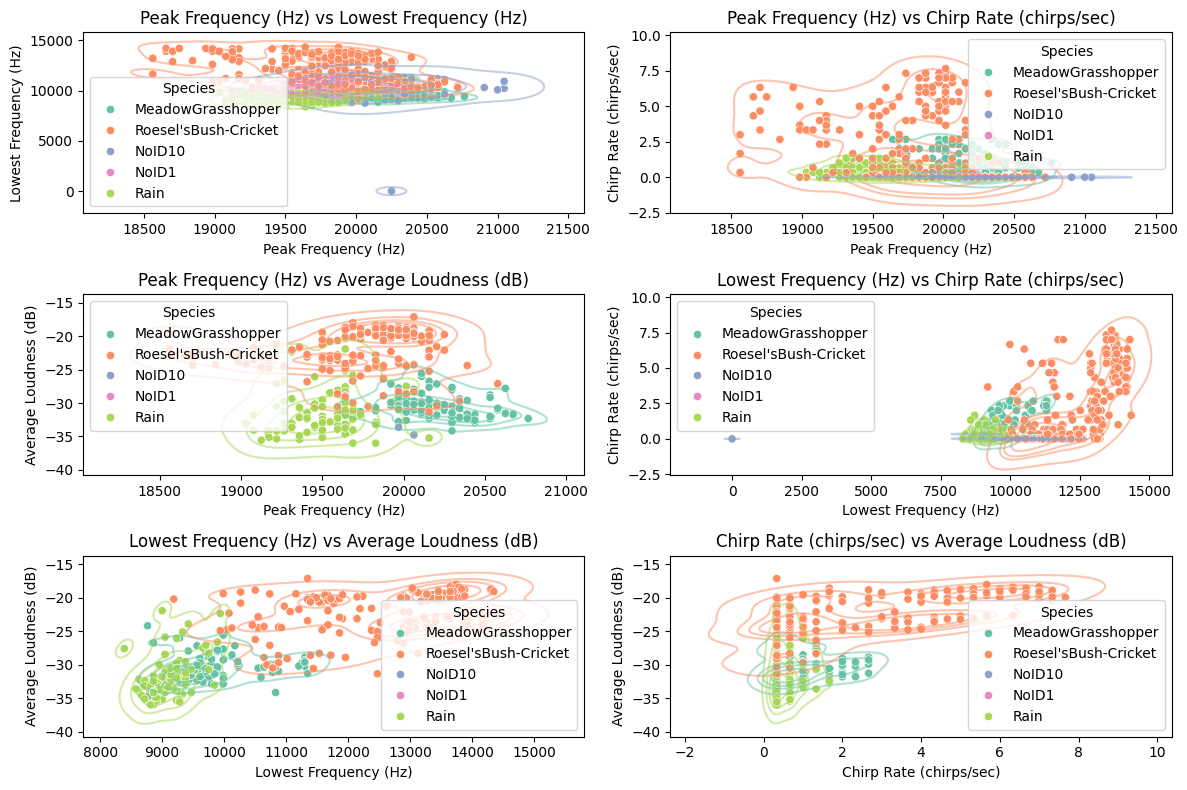

In [8]:
data = pd.read_csv('chirp-analysis-results.csv')

features = ['Peak Frequency (Hz)', 'Lowest Frequency (Hz)', 'Chirp Rate (chirps/sec)', 'Average Loudness (dB)']

plt.figure(figsize=(12, 8)) 

plotIdx = 1  
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:  
            plt.subplot(3, 2, plotIdx) 
            
            sns.scatterplot(data=data, x=feature1, y=feature2, hue='Species', palette='Set2', legend=True) # to remove the legend 
            
            # Add ellipses (kernel density estimation)
            for species in data['Species'].unique():
                subset = data[data['Species'] == species]
                sns.kdeplot(
                    data=subset, x=feature1, y=feature2, levels=5, color=sns.color_palette('Set2')[list(data['Species'].unique()).index(species)],
                    linewidths=1.5, alpha=0.5
                )
            
            plt.title(f'{feature1} vs {feature2}')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plotIdx += 1  

plt.tight_layout()
plt.show()

# **t-SNE**

C:\Users\Student\AppData\Local\Temp\ipykernel_14508\2471079097.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Average Loudness (dB)'].replace(-np.inf, np.nan, inplace=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_14508\2471079097.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

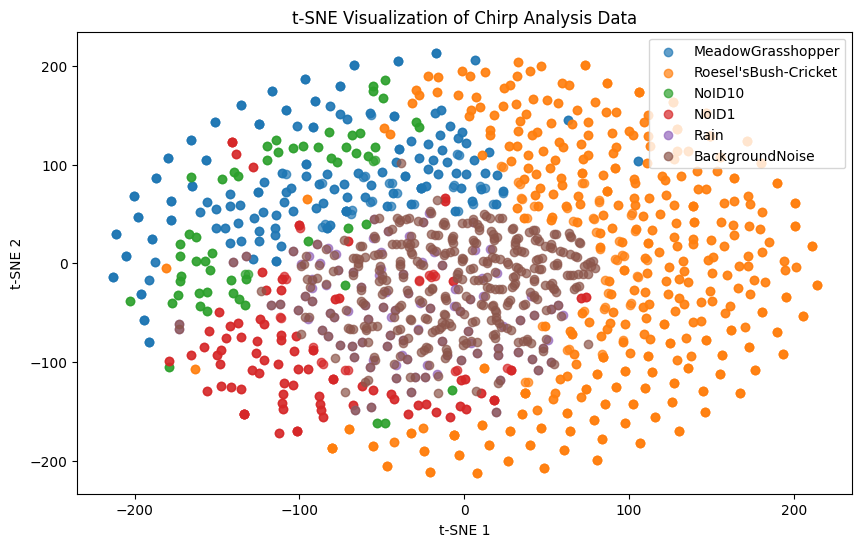

In [36]:
# Step 1: Load the dataset
data = pd.read_csv('chirp-analysis-results.csv')

# Step 2: Preprocess the data
# Replace -inf with NaN (Not a Number), and then fill NaN with a specific value (e.g., median or mean)
data['Average Loudness (dB)'].replace(-np.inf, np.nan, inplace=True)
data['Average Loudness (dB)'].fillna(data['Average Loudness (dB)'].median(), inplace=True)

# Step 3: Select the relevant features (excluding 'Species' column for t-SNE)
features = data[['Peak Frequency (Hz)', 'Lowest Frequency (Hz)', 'Chirp Rate (chirps/sec)', 'Average Loudness (dB)', 'Background Noise (dB)']]

# Step 4: Standardize the features (important for t-SNE)
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)

# Step 5: Apply t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, random_state=42, perplexity=2)  # Adjust perplexity to a smaller value
tsneResult = tsne.fit_transform(scaledFeatures)

# Step 6: Add the t-SNE results to the original dataset
data['t-SNE 1'] = tsneResult[:, 0]
data['t-SNE 2'] = tsneResult[:, 1]

# Step 7: Visualize the results
plt.figure(figsize=(10, 6))
for species in data['Species'].unique():
    speciesData = data[data['Species'] == species]
    plt.scatter(speciesData['t-SNE 1'], speciesData['t-SNE 2'], label=species, alpha=0.7)

plt.title('t-SNE Visualization of Chirp Analysis Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

# Spectrogram

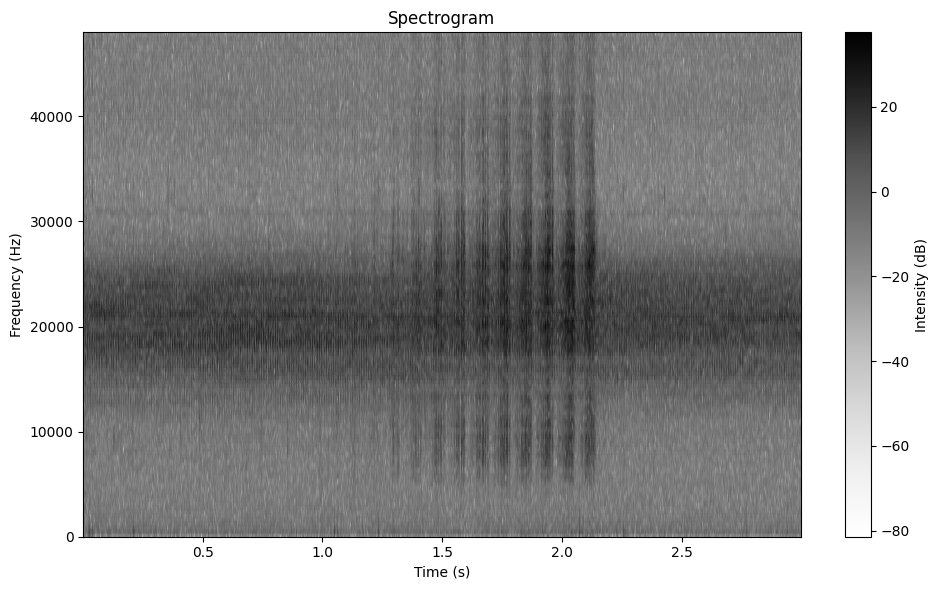

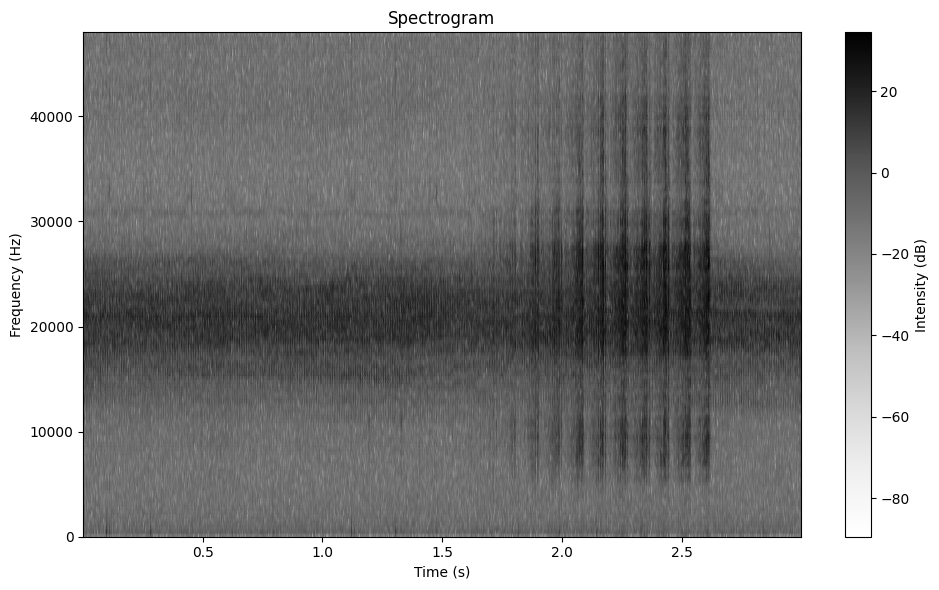

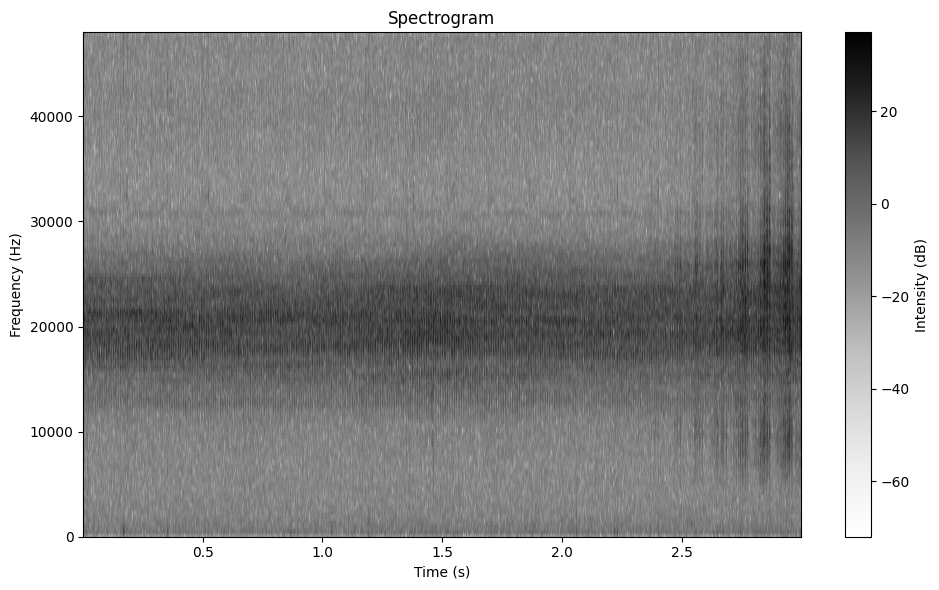

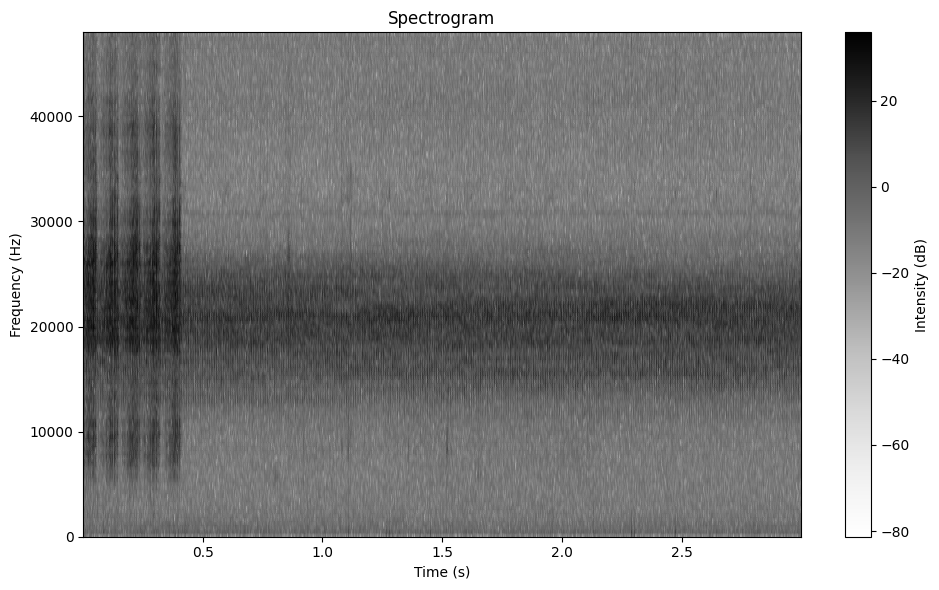

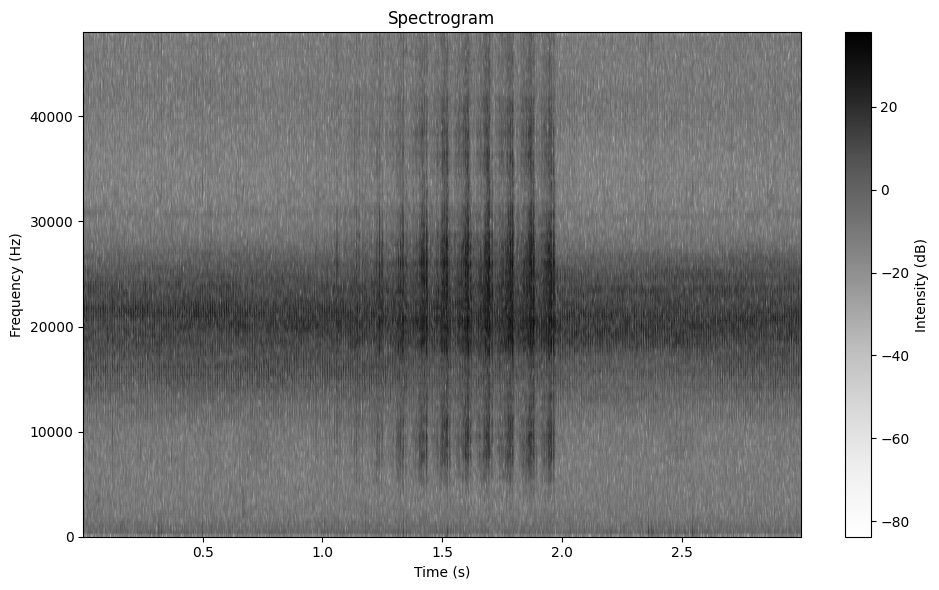

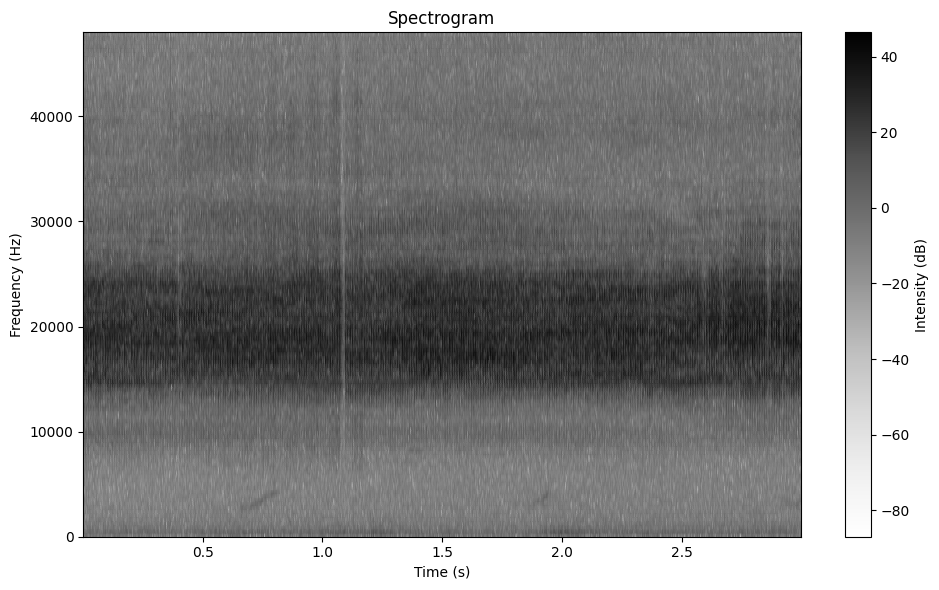

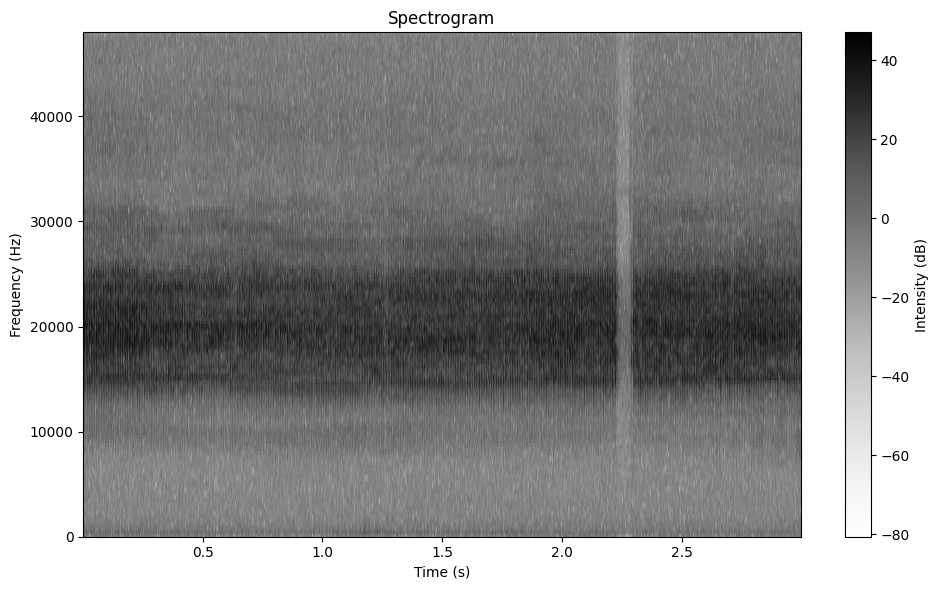

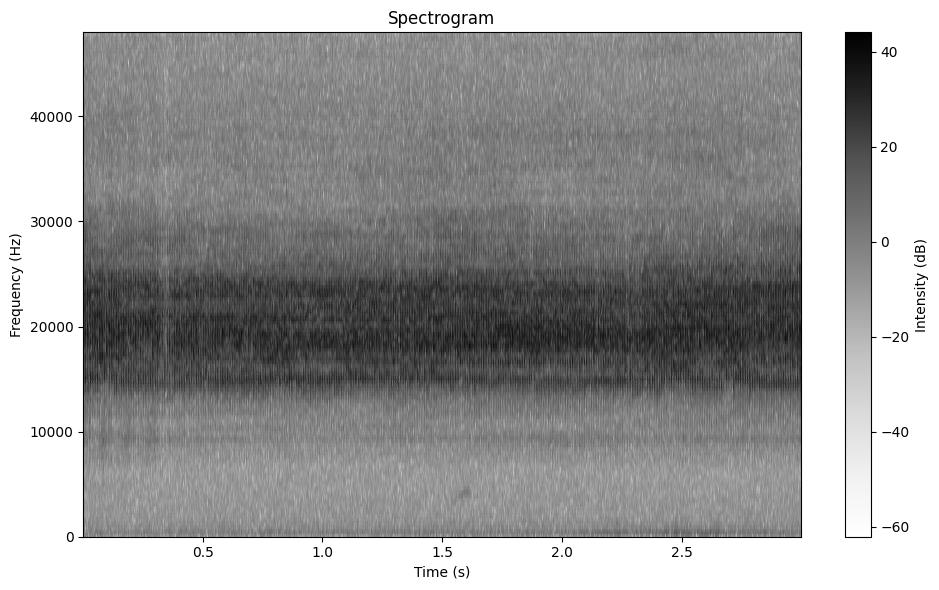

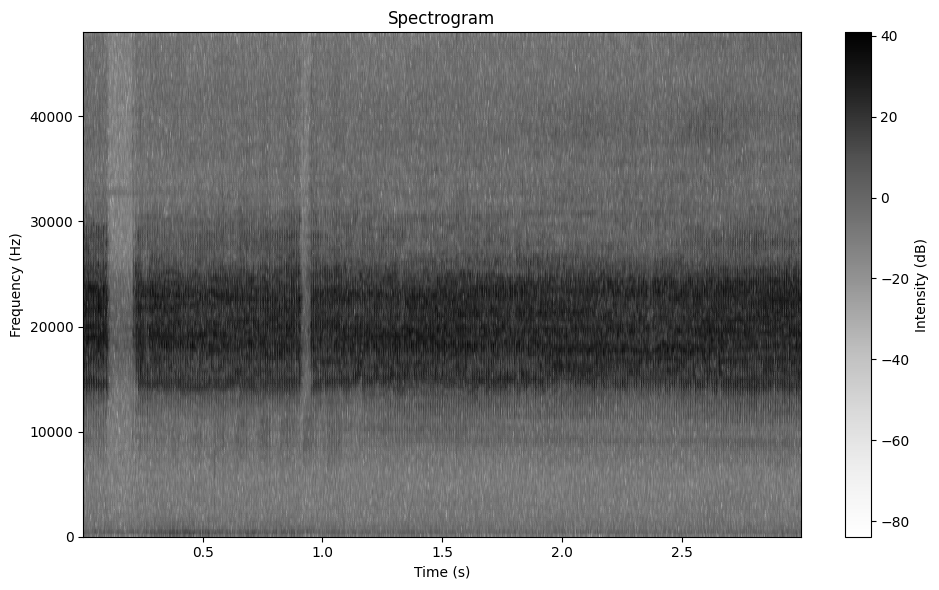

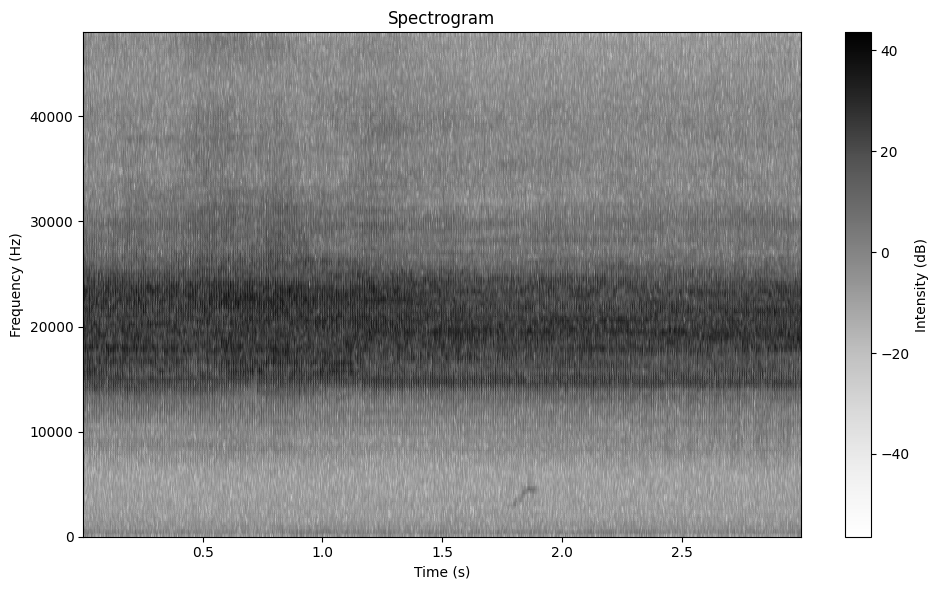

In [5]:
def showSpectrogram(audioFile):
    # Read the wav file
    sample_rate, audio_data = wav.read(audioFile)

    # If the audio has multiple channels, use only the first one
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]

    # Generate the spectrogram
    frequencies , time, intensity = spectrogram(audio_data, fs=sample_rate)

    # Convert the spectrogram to decibels for better visualization
    intensity_dB = 10 * np.log10(intensity + 1e-10)  # Avoid log(0)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time, frequencies , intensity_dB, shading='gouraud', cmap='Greys') # gouraud or nearest for shading
    plt.colorbar(label='Intensity (dB)')
    plt.title("Spectrogram")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    audioFile = "testClips/Roesel'sBush-Cricket_Test1.wav"  # Path to .wav file
    audioFile2 = "testClips/MeadowGrasshopper_Test1.wav"

    audioFolder = "testClips"

    for file in os.listdir(audioFolder):
        if file.endswith(".wav"):  # Process only .wav files
            filePath = os.path.join(audioFolder, file)  # Get the full path
            showSpectrogram(filePath)




    #spec1 = showSpectrogram(audioFile)
    #spec2 = showSpectrogram(audioFile2)

# binary spectrograms

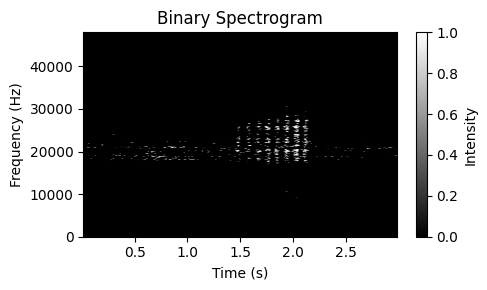

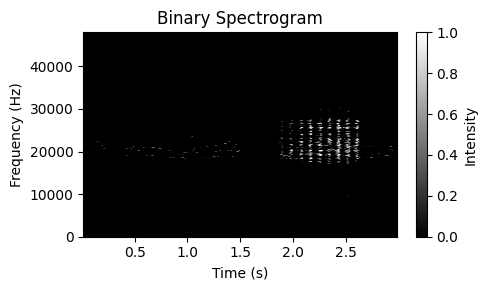

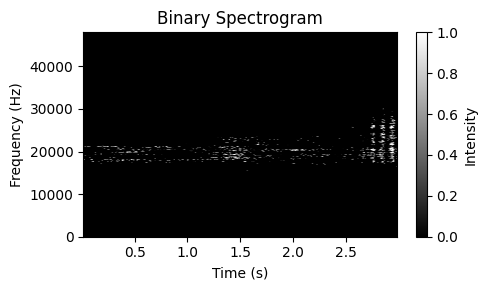

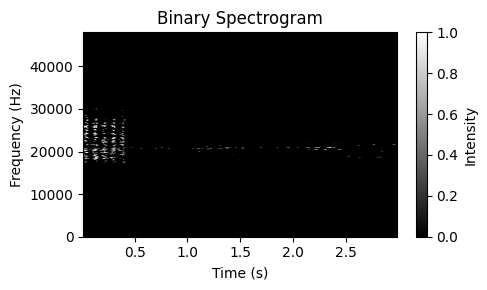

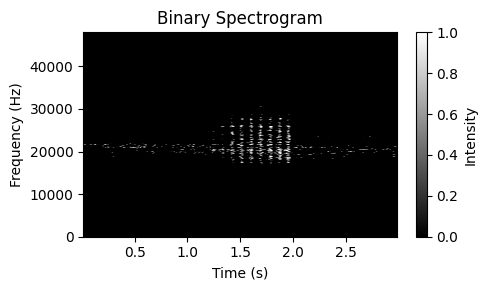

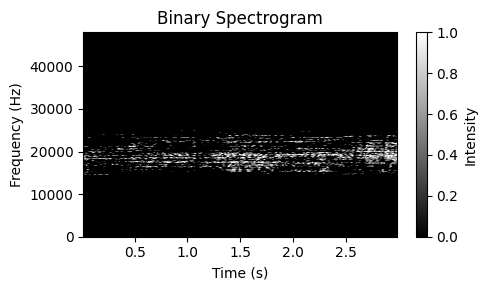

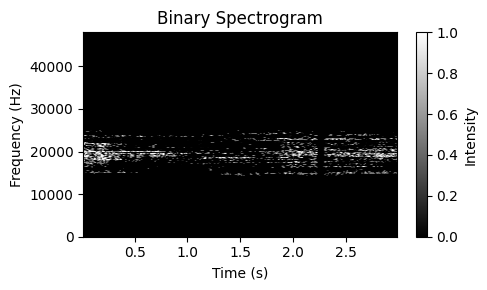

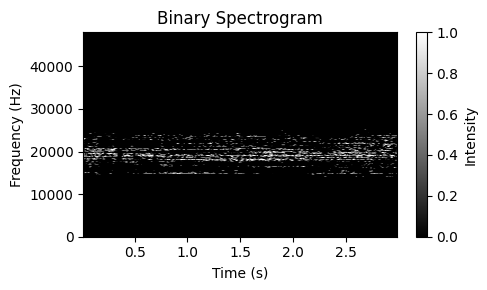

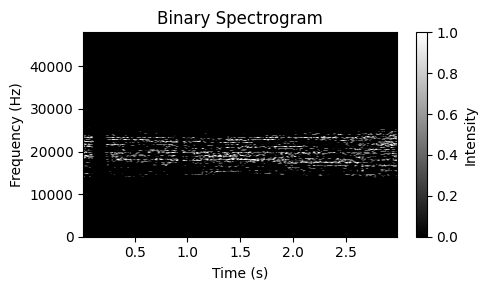

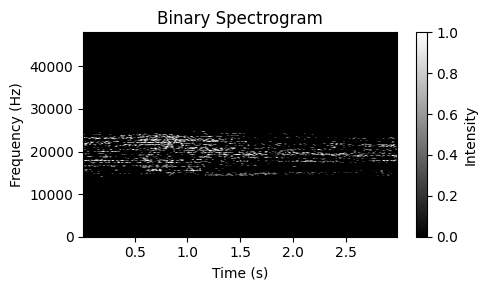

In [32]:
def showBinarySpectrogram(audioFile, threshold=0.05):   #change threshold to detemine how much is seen # originally at 0.1 
    # Read the wav file
    sampleRate, audioData = wav.read(audioFile)

    # If the audio has multiple channels, use only the first one
    if len(audioData.shape) > 1:
        audioData = audioData[:, 0]


    nps = 2048 # FFT Window Size - Larger FFT windows improve frequency resolution but reduce time resolution # default 256   now 2048
    # Generate the spectrogram with higher resolution
    frequencies, time, intensity = spectrogram(audioData, 
                                               fs=sampleRate, 
                                               nperseg=nps,    
                                               noverlap=(nps/2))
    


    # Normalize the intensity
    intensityNorm = np.clip(intensity / np.max(intensity), 0, 1)

    # Apply the threshold
    binarySpectrogram = intensityNorm > threshold

    # Restrict frequency range (optional)
    mask = (frequencies >= 0) & (frequencies <= 50000)
    frequencies = frequencies[mask]
    binarySpectrogram = binarySpectrogram[mask, :]

    # Plot the binary spectrogram
    plt.figure(figsize=(5, 3))
    plt.pcolormesh(time, frequencies, binarySpectrogram, cmap='gray', shading='gouraud')
    plt.colorbar(label="Intensity")
    plt.title("Binary Spectrogram")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    audioFile = "testClips/Roesel'sBush-Cricket_Test1.wav"  # Path to .wav file
    audioFile2 = "testClips/MeadowGrasshopper_Test1.wav"

    audioFolder = "testClips"

    for file in os.listdir(audioFolder):
        if file.endswith(".wav"):  # Process only .wav files
            filePath = os.path.join(audioFolder, file)  # Get the full path
            showBinarySpectrogram(filePath)

# Open CV

## saving images

### spectrogram (non binary)

In [35]:
# for spectrogram images (non binary)

def saveSpectrogramAsImage(audioFile, outputPath):
    # Read the wav file
    sampleRate, audioData = wav.read(audioFile)

    # If the audio has multiple channels, use only the first one
    if len(audioData.shape) > 1:
        audioData = audioData[:, 0]

    # Generate the spectrogram
    frequencies, time, intensity = spectrogram(audioData, fs=sampleRate)

    # Convert the spectrogram to decibels for better visualization
    intensityDb = 10 * np.log10(intensity + 1e-10)  # Avoid log(0)

    # Save the spectrogram as an image
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time, frequencies, intensityDb, shading='gouraud', cmap='Greys')  # gouraud or nearest for shading
    plt.axis('off')  # Remove axes for OpenCV processing
    plt.tight_layout()
    plt.savefig(outputPath, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to free memory



if __name__ == "__main__":
    audioFolder = "testClips"  # Folder containing audio files
    outputFolder = "spectrogramImages"  # Folder to save spectrogram images

    # Create output folder if it doesn't exist
    os.makedirs(outputFolder, exist_ok=True)

    for file in os.listdir(audioFolder):
        if file.endswith(".wav"):  # Process only .wav files
            filePath = os.path.join(audioFolder, file)
            outputImagePath = os.path.join(outputFolder, f"{os.path.splitext(file)[0]}.png")

            # Step 1: Generate and save the spectrogram as an image
            saveSpectrogramAsImage(filePath, outputImagePath)



### saving the binary images and the processed binary images

In [ ]:
def sauvolaThresholding(intensityNorm, windowSize=15, k=0.5, R=128):
    intensityScaled = (intensityNorm * 255).astype(np.uint8)

    # compute local mean and standard deviation using OpenCV's boxFilter (fast convolution)
    mean = cv2.boxFilter(intensityScaled, ddepth=-1, ksize=(windowSize, windowSize))
    meanSq = cv2.boxFilter(intensityScaled**2, ddepth=-1, ksize=(windowSize, windowSize))
    
    #standard deviation - sqrt(E[X^2] - (E[X])^2)
    std = np.sqrt(meanSq - mean**2)

    threshold = mean * (1 + k * ((std / R) - 1))

    binarySpectrogram = intensityScaled > threshold

    return binarySpectrogram



def saveBinarySpectrogramAsImage(audioFile, outputPath):
    sampleRate, audioData = wav.read(audioFile)

    # If the audio has multiple channels, use only the first one
    if len(audioData.shape) > 1:
        audioData = audioData[:, 0]

    # Set FFT Window Size and Overlap
    nps = 2048  # Larger FFT window improves frequency resolution
    frequencies, time, intensity = spectrogram(audioData, 
                                               fs=sampleRate, 
                                               nperseg=nps, 
                                               noverlap=(nps // 2))

    # Restrict frequency range (Move this BEFORE thresholding)
    mask = (frequencies >= 10000) & (frequencies <= 40000)
    frequencies = frequencies[mask]
    intensity = intensity[mask, :]  

    # Normalize the intensity
    intensityNorm = np.clip(intensity / np.max(intensity), 0, 1)

    binarySpectrogram = sauvolaThresholding(intensityNorm, windowSize=15, k=0.5)

    # Save the binary spectrogram as an image
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time, frequencies, binarySpectrogram, cmap='gray', shading='gouraud')
    plt.axis('off')  
    plt.tight_layout()
    plt.savefig(outputPath, bbox_inches='tight', pad_inches=0)
    plt.close()  


def processImage(inputImagePath, outputFolder):
    # Load the binary spectrogram image
    image = cv2.imread(inputImagePath, 0)
    kernel = np.ones((5, 5), np.uint8)

    # Apply median filtering
    medianFilteredImage = cv2.medianBlur(image, 5)

    # Apply dilation
    dilatedImage = cv2.dilate(medianFilteredImage, kernel, iterations=1)

    # Apply dilation then erosion
    dilatedThenEroded = cv2.erode(dilatedImage, kernel, iterations=1)

    # Apply dilation again
    #dilatedAgain = cv2.dilate(dilatedThenEroded, kernel, iterations=1)

    processedImage = dilatedThenEroded
    # Save processed images
    baseName = os.path.splitext(os.path.basename(inputImagePath))[0]
    cv2.imwrite(os.path.join(outputFolder, f"{baseName}_processed_img.png"), processedImage)

if __name__ == "__main__":
    # for testing -  testClips  # main folder - LabelledAudioChunks     
    audioFolder = "LabelledAudioChunks"  # Folder containing audio files      # default = LabelledAudioChunks
    binarySpectrogramFolder = "binarySpectrogramImages"  # Folder to save binary spectrogram images     # default = binarySpectrogramImages #test = testBinSpecImgsFolder
    processedImagesFolder = "processedSpectrogramImages"  # Folder to save processed images  # default = processedSpectrogramImages    #test = testProcessedSpecImgsFolder




    # Create output folders if they don't exist
    os.makedirs(binarySpectrogramFolder, exist_ok=True)
    os.makedirs(processedImagesFolder, exist_ok=True)

    # Generate binary spectrograms with progress bar
    audioFiles = [file for file in os.listdir(audioFolder) if file.endswith(".wav")]
    for file in tqdm(audioFiles, desc="Generating Binary Spectrograms"):
        filePath = os.path.join(audioFolder, file)
        outputImagePath = os.path.join(binarySpectrogramFolder, f"{os.path.splitext(file)[0]}_binary.png")

        # Generate and save the binary spectrogram as an image
        saveBinarySpectrogramAsImage(filePath, outputImagePath)

    # Process each generated binary spectrogram with progress bar
    spectrogramFiles = [file for file in os.listdir(binarySpectrogramFolder) if file.endswith(".png")]
    for file in tqdm(spectrogramFiles, desc="Processing Spectrogram Images"):
        inputImagePath = os.path.join(binarySpectrogramFolder, file)

        # Apply image processing and save the results
        processImage(inputImagePath, processedImagesFolder)

Processing Spectrogram Images: 100%|██████████| 1685/1685 [00:39<00:00, 42.82it/s]


## Testing image processing

### testing edge detection and kkeypoint detection

In [ ]:
# testing edge detection and kkeypoint detection

def processSpectrogramWithOpencv(imagePath):
    # Check if the image exists at the specified path
    if not os.path.exists(imagePath):
        print(f"Error: The file at {imagePath} does not exist.")
        return None, None

    # Load the spectrogram image in grayscale
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Failed to load image from {imagePath}")
        return None, None

    # Resize the image to a standard size
    resizedImage = cv2.resize(image, (224, 50))
    
    # Thresholding to create a binary image
    _, binaryImage = cv2.threshold(resizedImage, 127, 255, cv2.THRESH_BINARY)
    
    # Edge detection using Canny
    edges = cv2.Canny(binaryImage, 50, 150)

    # Display intermediate results
    cv2.imshow("Original Spectrogram", resizedImage)
    cv2.imshow("Binary Spectrogram", binaryImage)
    cv2.imshow("Edges", edges)

    # Keypoint detection with SIFT
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(resizedImage, None)
    imageWithKeypoints = cv2.drawKeypoints(resizedImage, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display keypoints
    cv2.imshow("Keypoints", imageWithKeypoints)
    cv2.waitKey(1) # 1 shuts down image imediately, 0 waits for keyboard input
    cv2.destroyAllWindows()

    # You can return descriptors or features for further analysis
    return keypoints, descriptors


if __name__ == "__main__":
    imageFolder = "binarySpectrogramImages"  # Folder containing spectrogram images

    for outputImagePath in os.listdir(imageFolder):
        # Create the full path to the image
        fullImagePath = os.path.join(imageFolder, outputImagePath)
        
        print(f"Processing {fullImagePath}...")
        
        keypoints, descriptors = processSpectrogramWithOpencv(fullImagePath)

Processing binarySpectrogramImages\MeadowGrasshopper_Test1_binary.png...
Processing binarySpectrogramImages\MeadowGrasshopper_Test2_binary.png...
Processing binarySpectrogramImages\MeadowGrasshopper_Test3_binary.png...
Processing binarySpectrogramImages\MeadowGrasshopper_Test4_binary.png...
Processing binarySpectrogramImages\MeadowGrasshopper_Test5_binary.png...
Processing binarySpectrogramImages\Roesel'sBush-Cricket_Test1_binary.png...
Processing binarySpectrogramImages\Roesel'sBush-Cricket_Test2_binary.png...
Processing binarySpectrogramImages\Roesel'sBush-Cricket_Test3_binary.png...
Processing binarySpectrogramImages\Roesel'sBush-Cricket_Test4_binary.png...
Processing binarySpectrogramImages\Roesel'sBush-Cricket_Test5_binary.png...


### dilation, erosion and median filtering 

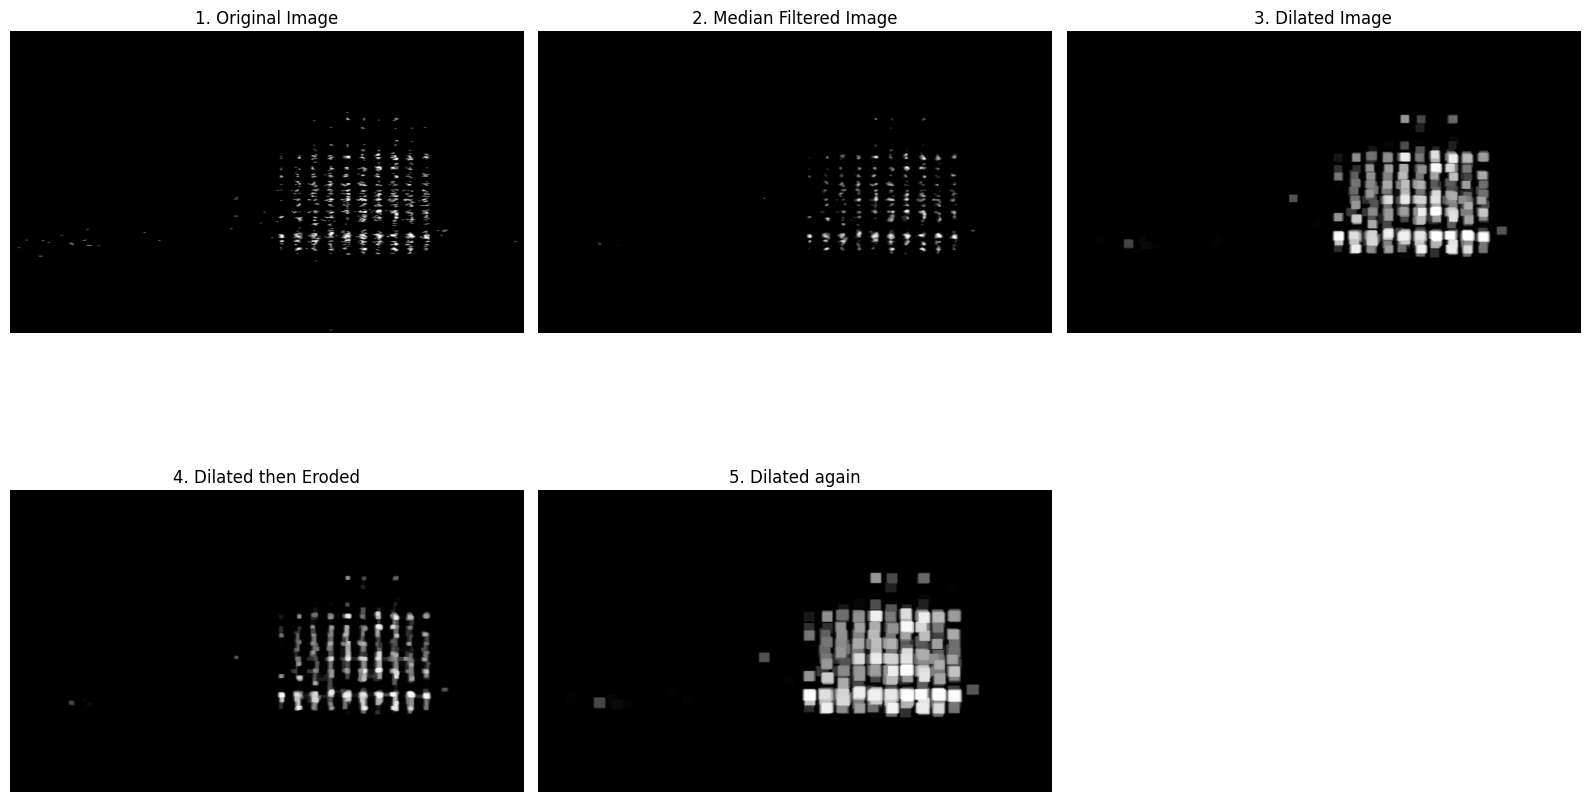

In [4]:
# for viewing and testing dilation and erosion, as well as median filtering

image = cv2.imread("binarySpectrogramImages\\MeadowGrasshopper_1_binary.png", 0)
#image = cv2.imread("binarySpectrogramImages\\Roesel'sBush-Cricket_303_binary.png", 0)
#image = cv2.imread("binarySpectrogramImages\\NoID10_50_binary.png", 0)
kernel = np.ones((5, 5), np.uint8)


medianFilteredImage = cv2.medianBlur(image, 5)


#iterations for both is default at 1.    2(d) and 4(e) looks good too 
# a. Apply dilation
dilatedImage = cv2.dilate(medianFilteredImage, kernel, iterations=3)

# Apply erosion - less important
erodedImage = cv2.erode(medianFilteredImage, kernel, iterations=1)


# b. Apply dilation then erosion
dilatedThenEroded = cv2.erode(dilatedImage, kernel, iterations=2)

# second filter can be used
#median_filtered_image_2 = cv2.medianBlur(dilated_then_eroded, 5)

# c. Apply dilation again
dilatedAgain = cv2.dilate(dilatedThenEroded, kernel, iterations=3)

# some good iteration combos are: (a=1, b=2, c=2or3), (a=2, b=3, c=1or0)

plt.figure(figsize=(16, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.title("1. Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
# Median Filtered Image
plt.subplot(2, 3, 2)
plt.title("2. Median Filtered Image")
plt.imshow(medianFilteredImage, cmap='gray')
plt.axis('off')
# Dilated Image
plt.subplot(2, 3, 3)
plt.title("3. Dilated Image")
plt.imshow(dilatedImage, cmap='gray')
plt.axis('off')
# Eroded Image
#plt.subplot(2, 3, 3)
#plt.title("Eroded Image")
#plt.imshow(erodedImage, cmap='gray')
#plt.axis('off')
# Dilated then Eroded
plt.subplot(2, 3, 4)
plt.title("4. Dilated then Eroded")
plt.imshow(dilatedThenEroded, cmap='gray')
plt.axis('off')
# Eroded then Dilated
plt.subplot(2, 3, 5)
plt.title("5. Dilated again")
plt.imshow(dilatedAgain, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## fit model with openCV data

### SVN model testing

In [2]:
# svn model

def extractFeaturesFromSpectrogram(imagePath, max_desc_length=137): 
    if not os.path.exists(imagePath):
        print(f"Error: The file at {imagePath} does not exist.")
        return None
    
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Failed to load image from {imagePath}")
        return None

    resizedImage = cv2.resize(image, (224, 224))
    
    # keypoint detection with SIFT
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(resizedImage, None)
    
    if descriptors is None:
        return None
    
    # pad or truncate the descriptors to a fixed length
    if descriptors.shape[0] < max_desc_length:
        padding = np.zeros((max_desc_length - descriptors.shape[0], descriptors.shape[1]))
        descriptors = np.vstack([descriptors, padding])
    elif descriptors.shape[0] > max_desc_length:
        descriptors = descriptors[:max_desc_length, :]
    
    return descriptors.flatten()  # turn into a 1D array

def getSpeciesLabel(fileName):
    return fileName.split('_')[0]

def loadData(imageFolder):
    features = []
    labels = []

    imageFiles = [file for file in os.listdir(imageFolder) if file.endswith(".png")]

    for file in tqdm(imageFiles, desc="Processing Images"):
        filePath = os.path.join(imageFolder, file)
        
        label = getSpeciesLabel(file)
        feature = extractFeaturesFromSpectrogram(filePath)
        
        if feature is not None:
            features.append(feature)
            labels.append(label)  
    
    return np.array(features), np.array(labels)

if __name__ == "__main__":
    imageFolder = "processedSpectrogramImages"  # default = processedSpectrogramImages

    X, y = loadData(imageFolder)
    
    if X.shape[0] == 0:
        print("No valid data found. Exiting.")
        exit()
    
    # Encode species labels as integers
    from sklearn.preprocessing import LabelEncoder
    labelEncoder = LabelEncoder()
    yEncoded = labelEncoder.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, yEncoded, test_size=0.2, random_state=123)
    
    classifier = SVC(kernel='linear', random_state=123)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    

Processing Images:   0%|          | 0/1685 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 1685/1685 [00:33<00:00, 50.78it/s]


Model Accuracy: 88.99%


### CNN model testing (its good)

Processing Images: 100%|██████████| 1685/1685 [00:06<00:00, 244.75it/s]



Epoch 1/10, Loss: 0.4843, Accuracy: 84.79%
Validation Accuracy: 97.92%


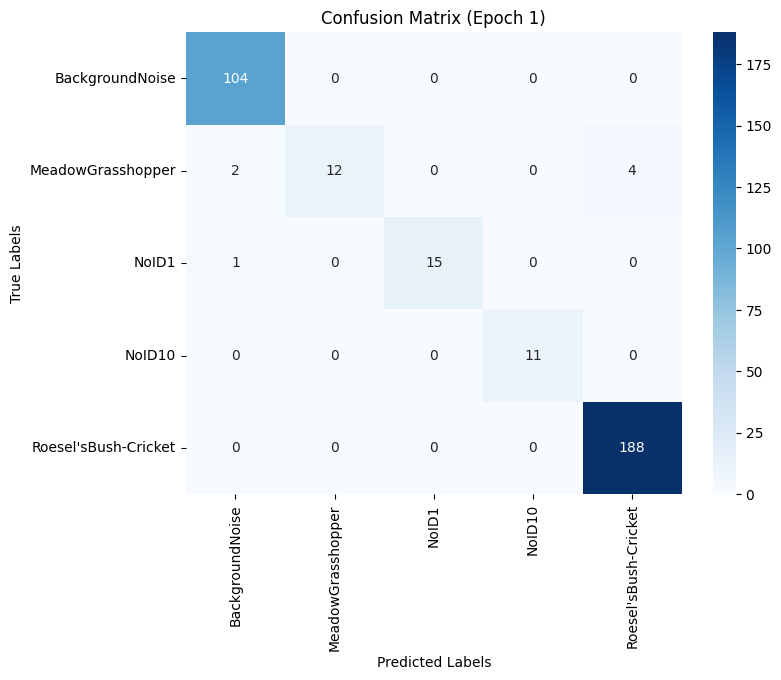

Precision (Weighted): 0.9797
Recall (Weighted):    0.9792
F1 Score (Weighted):  0.9775

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       0.97      1.00      0.99       104
   MeadowGrasshopper       1.00      0.67      0.80        18
               NoID1       1.00      0.94      0.97        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       0.98      1.00      0.99       188

            accuracy                           0.98       337
           macro avg       0.99      0.92      0.95       337
        weighted avg       0.98      0.98      0.98       337


Epoch 2/10, Loss: 0.1007, Accuracy: 97.18%
Validation Accuracy: 95.25%


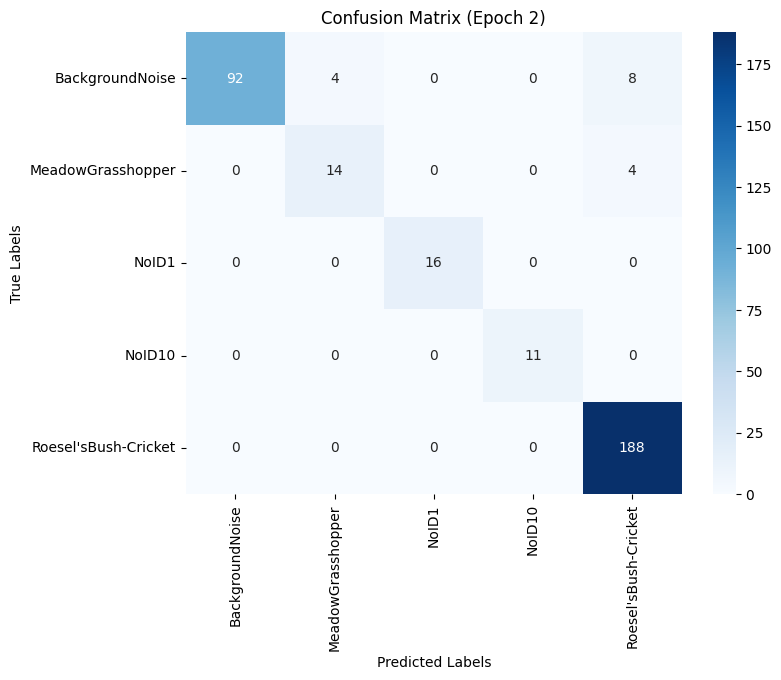

Precision (Weighted): 0.9547
Recall (Weighted):    0.9525
F1 Score (Weighted):  0.9520

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      0.88      0.94       104
   MeadowGrasshopper       0.78      0.78      0.78        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       0.94      1.00      0.97       188

            accuracy                           0.95       337
           macro avg       0.94      0.93      0.94       337
        weighted avg       0.95      0.95      0.95       337


Epoch 3/10, Loss: 0.0633, Accuracy: 98.37%
Validation Accuracy: 99.70%


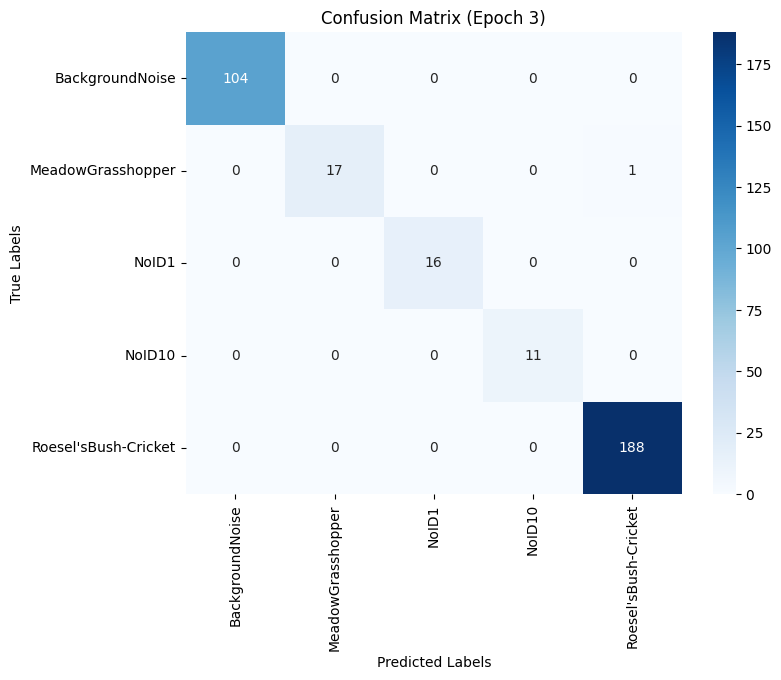

Precision (Weighted): 0.9970
Recall (Weighted):    0.9970
F1 Score (Weighted):  0.9970

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      1.00      1.00       104
   MeadowGrasshopper       1.00      0.94      0.97        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       0.99      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       1.00      0.99      0.99       337
        weighted avg       1.00      1.00      1.00       337


Epoch 4/10, Loss: 0.0587, Accuracy: 98.44%
Validation Accuracy: 99.70%


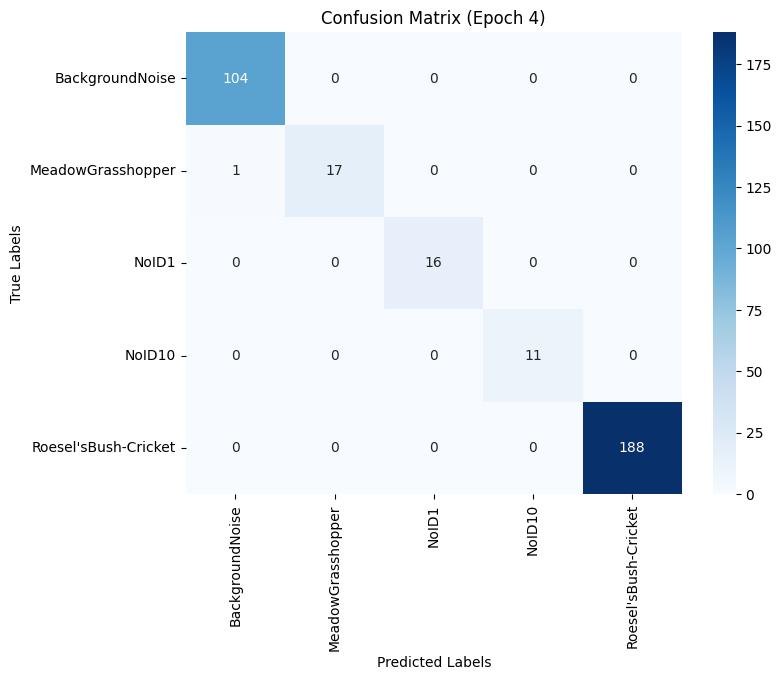

Precision (Weighted): 0.9971
Recall (Weighted):    0.9970
F1 Score (Weighted):  0.9970

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       0.99      1.00      1.00       104
   MeadowGrasshopper       1.00      0.94      0.97        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       1.00      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       1.00      0.99      0.99       337
        weighted avg       1.00      1.00      1.00       337


Epoch 5/10, Loss: 0.0604, Accuracy: 98.29%
Validation Accuracy: 96.74%


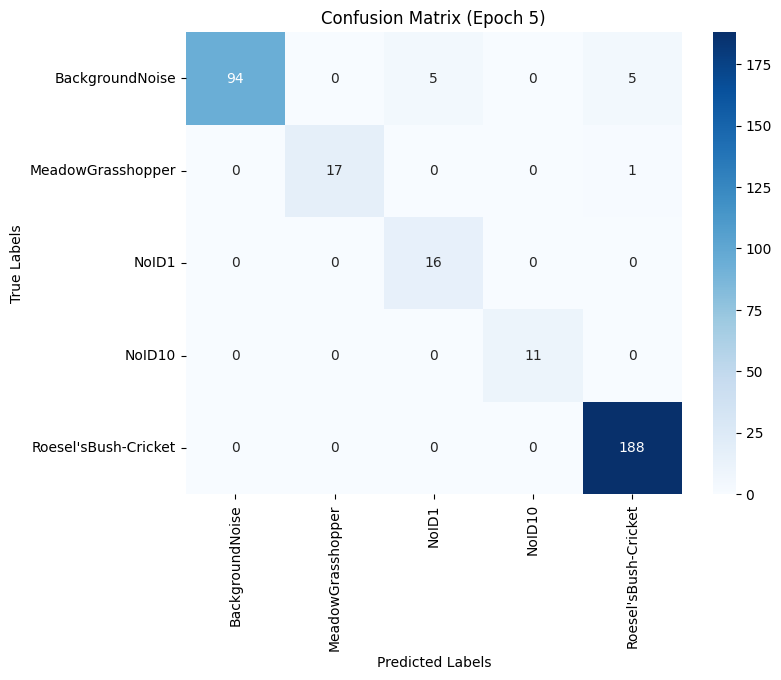

Precision (Weighted): 0.9714
Recall (Weighted):    0.9674
F1 Score (Weighted):  0.9677

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      0.90      0.95       104
   MeadowGrasshopper       1.00      0.94      0.97        18
               NoID1       0.76      1.00      0.86        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       0.97      1.00      0.98       188

            accuracy                           0.97       337
           macro avg       0.95      0.97      0.95       337
        weighted avg       0.97      0.97      0.97       337


Epoch 6/10, Loss: 0.0580, Accuracy: 98.37%
Validation Accuracy: 100.00%


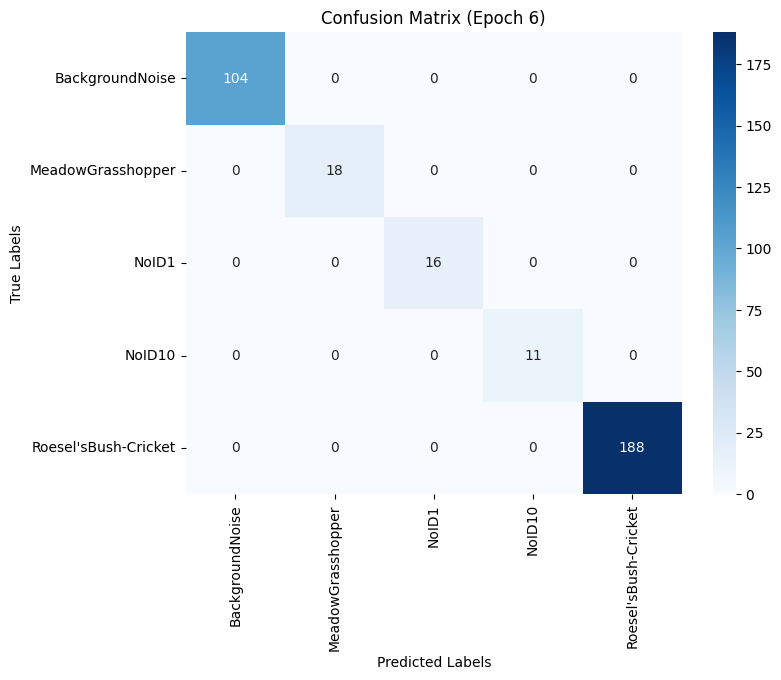

Precision (Weighted): 1.0000
Recall (Weighted):    1.0000
F1 Score (Weighted):  1.0000

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      1.00      1.00       104
   MeadowGrasshopper       1.00      1.00      1.00        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       1.00      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       1.00      1.00      1.00       337
        weighted avg       1.00      1.00      1.00       337


Epoch 7/10, Loss: 0.0296, Accuracy: 99.11%
Validation Accuracy: 100.00%


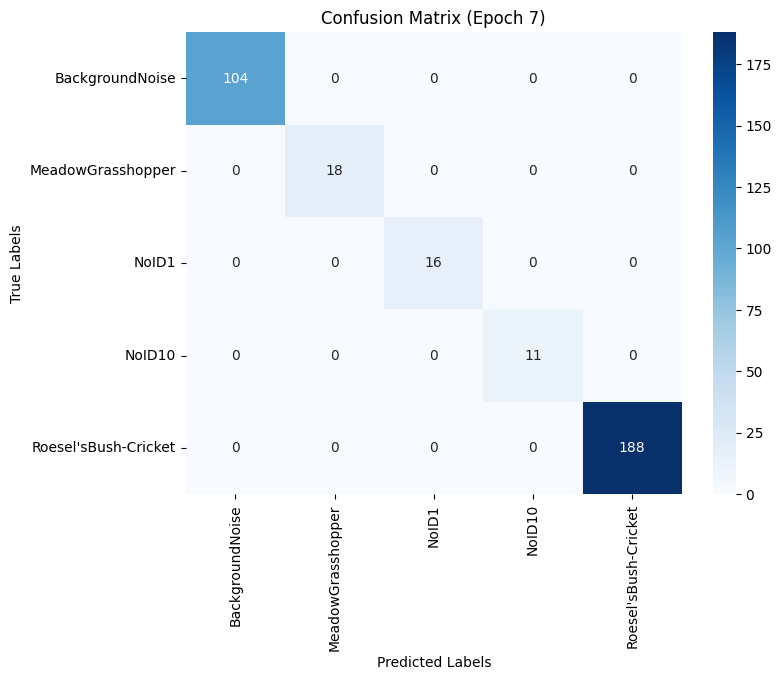

Precision (Weighted): 1.0000
Recall (Weighted):    1.0000
F1 Score (Weighted):  1.0000

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      1.00      1.00       104
   MeadowGrasshopper       1.00      1.00      1.00        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       1.00      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       1.00      1.00      1.00       337
        weighted avg       1.00      1.00      1.00       337


Epoch 8/10, Loss: 0.0281, Accuracy: 99.11%
Validation Accuracy: 99.70%


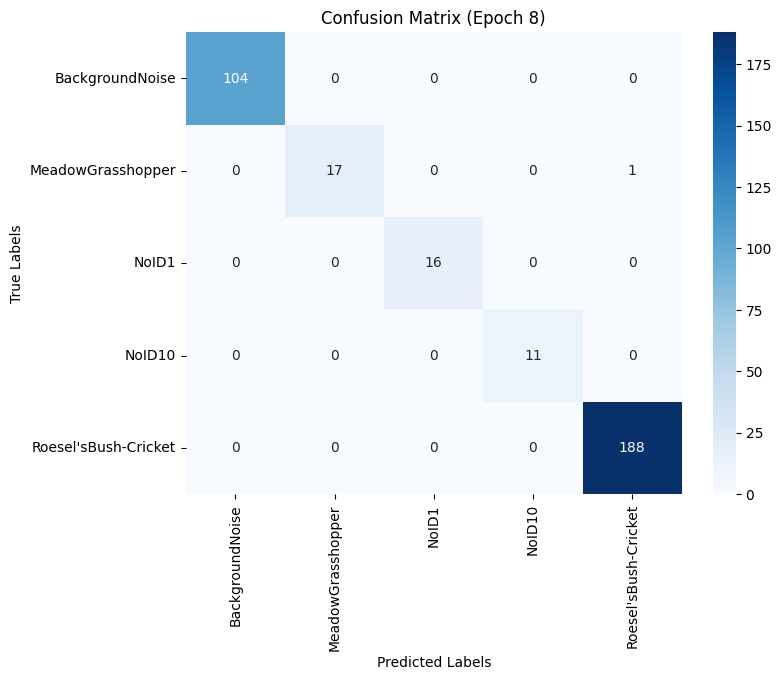

Precision (Weighted): 0.9970
Recall (Weighted):    0.9970
F1 Score (Weighted):  0.9970

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      1.00      1.00       104
   MeadowGrasshopper       1.00      0.94      0.97        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       0.99      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       1.00      0.99      0.99       337
        weighted avg       1.00      1.00      1.00       337


Epoch 9/10, Loss: 0.0285, Accuracy: 99.26%
Validation Accuracy: 100.00%


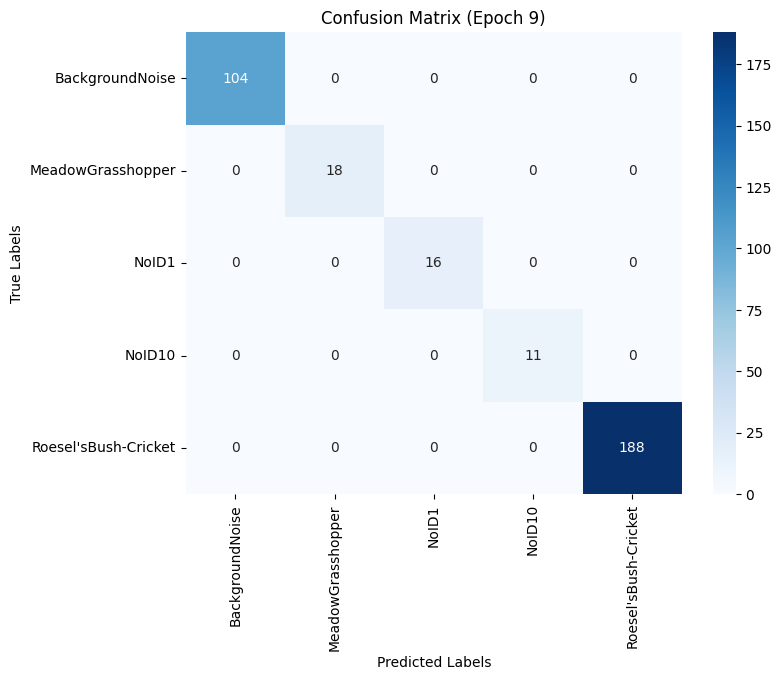

Precision (Weighted): 1.0000
Recall (Weighted):    1.0000
F1 Score (Weighted):  1.0000

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      1.00      1.00       104
   MeadowGrasshopper       1.00      1.00      1.00        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       1.00      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       1.00      1.00      1.00       337
        weighted avg       1.00      1.00      1.00       337


Epoch 10/10, Loss: 0.0336, Accuracy: 99.18%
Validation Accuracy: 99.70%


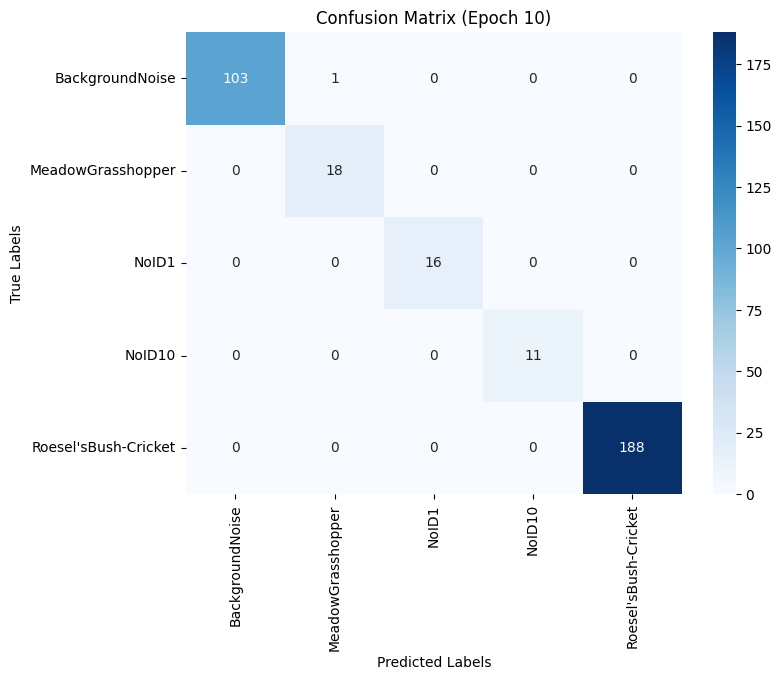

Precision (Weighted): 0.9972
Recall (Weighted):    0.9970
F1 Score (Weighted):  0.9971

Classification Report:
                      precision    recall  f1-score   support

     BackgroundNoise       1.00      0.99      1.00       104
   MeadowGrasshopper       0.95      1.00      0.97        18
               NoID1       1.00      1.00      1.00        16
              NoID10       1.00      1.00      1.00        11
Roesel'sBush-Cricket       1.00      1.00      1.00       188

            accuracy                           1.00       337
           macro avg       0.99      1.00      0.99       337
        weighted avg       1.00      1.00      1.00       337



In [5]:
# CNN model

random.seed(123)
np.random.seed(123)
torch.manual_seed(123)
torch.cuda.manual_seed_all(123)

class SpectrogramDataset(Dataset):
    def __init__(self, imageFolder, img_size=(224, 224)):
        self.imageFolder = imageFolder
        self.img_size = img_size
        self.images = []
        self.labels = []
        self.label_encoder = LabelEncoder()
        
        self.loadData()

    def loadData(self):
        imageFiles = [file for file in os.listdir(self.imageFolder) if file.endswith(".png")]
        
        for file in tqdm(imageFiles, desc="Processing Images"):
            filePath = os.path.join(self.imageFolder, file)
            
            image = cv2.imread(filePath, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error loading image {filePath}")
                continue
            
            resizedImage = cv2.resize(image, self.img_size)
            self.images.append(resizedImage)
            
            label = self.getSpeciesLabel(file)
            self.labels.append(label)
        
        self.images = np.array(self.images)
        self.labels = self.label_encoder.fit_transform(self.labels)

    def getSpeciesLabel(self, fileName):
        return fileName.split('_')[0]


    # 'dunder' methods (basically just used to make the dataset compatible with PyTorch's DataLoader)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].astype('float32') / 255.0  # normalize image
        image = torch.tensor(image).unsqueeze(0)  
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label



class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128) 
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # flatten 
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


def trainModel(model, train_loader, val_loader, num_epochs):    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # learning rate

    for epoch in range(num_epochs):
        model.train()
        runningLoss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            runningLoss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epochLoss = runningLoss / len(train_loader)
        epochAccuracy = 100 * correct / total

        print(f"\nEpoch {epoch+1}/{num_epochs}, Loss: {epochLoss:.4f}, Accuracy: {epochAccuracy:.2f}%")

        # Validation phase
        model.eval()
        valCorrect = 0
        valTotal = 0
        allPreds = []
        allLabels = []

        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                valTotal += labels.size(0)
                valCorrect += (predicted == labels).sum().item()

                # Store predictions and labels
                allPreds.extend(predicted.cpu().numpy())
                allLabels.extend(labels.cpu().numpy())

        valAccuracy = 100 * valCorrect / valTotal
        print(f"Validation Accuracy: {valAccuracy:.2f}%")

        # Compute and display confusion matrix
        cm = confusion_matrix(allLabels, allPreds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=dataset.label_encoder.classes_, 
                    yticklabels=dataset.label_encoder.classes_)
        plt.title(f"Confusion Matrix (Epoch {epoch+1})")
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # Calculate Precision, Recall, F1 Score
        precision = precision_score(allLabels, allPreds, average='weighted', zero_division=0)
        recall = recall_score(allLabels, allPreds, average='weighted', zero_division=0)
        f1 = f1_score(allLabels, allPreds, average='weighted', zero_division=0)

        print(f"Precision (Weighted): {precision:.4f}")
        print(f"Recall (Weighted):    {recall:.4f}")
        print(f"F1 Score (Weighted):  {f1:.4f}")

        # Optional: Full Classification Report
        print("\nClassification Report:")
        print(classification_report(allLabels, allPreds, target_names=dataset.label_encoder.classes_))


if __name__ == "__main__":
    imageFolder = "processedSpectrogramImages"  # default = processedSpectrogramImages
    imgSize = (224, 224) 
    
    dataset = SpectrogramDataset(imageFolder, imgSize)
    trainSize = int(0.8 * len(dataset))
    valSize = len(dataset) - trainSize
    trainDataset, valDataset = random_split(dataset, [trainSize, valSize])
    
    trainLoader = DataLoader(trainDataset, batch_size=10, shuffle=True)
    valLoader = DataLoader(valDataset, batch_size=10, shuffle=False)
    
    numClasses = len(np.unique(dataset.labels))
    
    model = CNNModel(num_classes=numClasses)
    
    # decide number of epochs
    # on seed 123 the model seems to startt overfitting past epoch 5
    trainModel(model, trainLoader, valLoader, num_epochs=10)

    # to save the model
    #torch.save(model.state_dict(), "cnn_grasshopper_cricket_classifier_26-02-2025.pth")


In [29]:
print(dataset.label_encoder.classes_)

['BackgroundNoise' 'MeadowGrasshopper' 'NoID1' 'NoID10'
 "Roesel'sBush-Cricket"]


### autoencoder testing

Processing Images:   0%|          | 0/149 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 149/149 [00:00<00:00, 452.22it/s]


Model Accuracy: 100.00%
                      precision    recall  f1-score   support

   MeadowGrasshopper       1.00      1.00      1.00        18
Roesel'sBush-Cricket       1.00      1.00      1.00        27

            accuracy                           1.00        45
           macro avg       1.00      1.00      1.00        45
        weighted avg       1.00      1.00      1.00        45

Number of samples in encoded data: 45


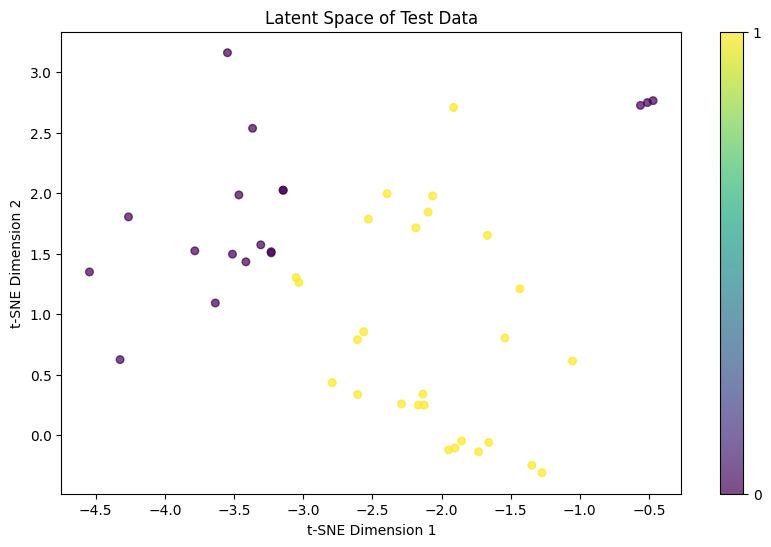

In [ ]:
# autoencoder

import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Function to extract features from spectrogram
def extractFeaturesFromSpectrogram(imagePath, image_size=(224, 224)):
    if not os.path.exists(imagePath):
        print(f"Error: The file at {imagePath} does not exist.")
        return None
    
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Failed to load image from {imagePath}")
        return None
    
    resized_image = cv2.resize(image, image_size)
    return resized_image.flatten()  # Flatten to 1D array

def getSpeciesLabel(fileName):
    return fileName.split('_')[0]

def loadData(imageFolder, image_size=(224, 224)):
    features = []
    labels = []

    imageFiles = [file for file in os.listdir(imageFolder) if file.endswith(".png")]
    for file in tqdm(imageFiles, desc="Processing Images"):
        filePath = os.path.join(imageFolder, file)
        label = getSpeciesLabel(file)
        feature = extractFeaturesFromSpectrogram(filePath, image_size=image_size)
        if feature is not None:
            features.append(feature)
            labels.append(label)
    
    return np.array(features), np.array(labels)

# Custom autoencoder using PCA
class AutoencoderPCA:
    def __init__(self, latent_dim):
        self.latent_dim = latent_dim
        self.encoder = PCA(n_components=latent_dim)
        self.decoder = None  # Reconstruction isn't needed in this application

    def fit(self, X):
        # Normalize data to range [0, 1] for better PCA performance
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        self.scaler = scaler
        
        # Fit PCA
        self.encoder.fit(X_scaled)
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        return self.encoder.transform(X_scaled)



# Visualize the latent space (encoded features)
def visualize_latent_space(encoded_data, labels, label_encoder, title="Latent Space Visualization"):
    tsne = TSNE(n_components=2, random_state=123)
    reducedData = tsne.fit_transform(encoded_data)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reducedData[:, 0], reducedData[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
    plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)))
    plt.title(title)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

    


if __name__ == "__main__":
    imageFolder = "processedSpectrogramImages"  

    # Load the data
    X, y = loadData(imageFolder)
    
    if X.shape[0] == 0:
        print("No valid data found. Exiting.")
        exit()
    
    # Encode species labels as integers
    labelEncoder = LabelEncoder()
    yEncoded = labelEncoder.fit_transform(y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, yEncoded, test_size=0.3, random_state=123)
    
    # Initialize and train the autoencoder
    latentDim = 100  # Number of dimensions in the latent space
    autoencoder = AutoencoderPCA(latent_dim=latentDim)
    autoencoder.fit(X_train)
    
    # Transform data to latent space
    X_train_encoded = autoencoder.transform(X_train)
    X_test_encoded = autoencoder.transform(X_test)
    
    # Train a classifier on the encoded features
    classifier = LogisticRegression(random_state=123)
    classifier.fit(X_train_encoded, y_train)
    
    # Evaluate the classifier
    y_pred = classifier.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred, target_names=labelEncoder.classes_))
    print(f"Number of samples in encoded data: {len(X_test_encoded)}")
    visualize_latent_space(X_test_encoded, y_test, labelEncoder, title="Latent Space of Test Data")



Processing Images:   0%|          | 0/171 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 171/171 [00:00<00:00, 410.01it/s]


Silhouette Score: 0.11


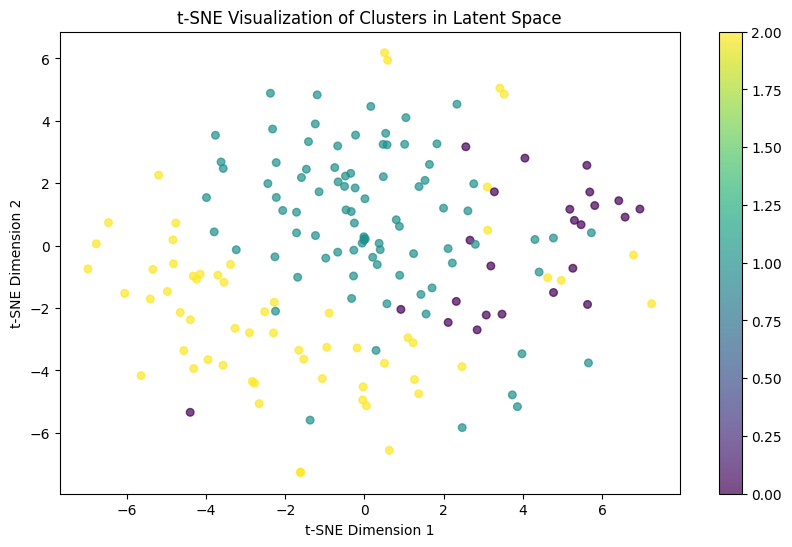

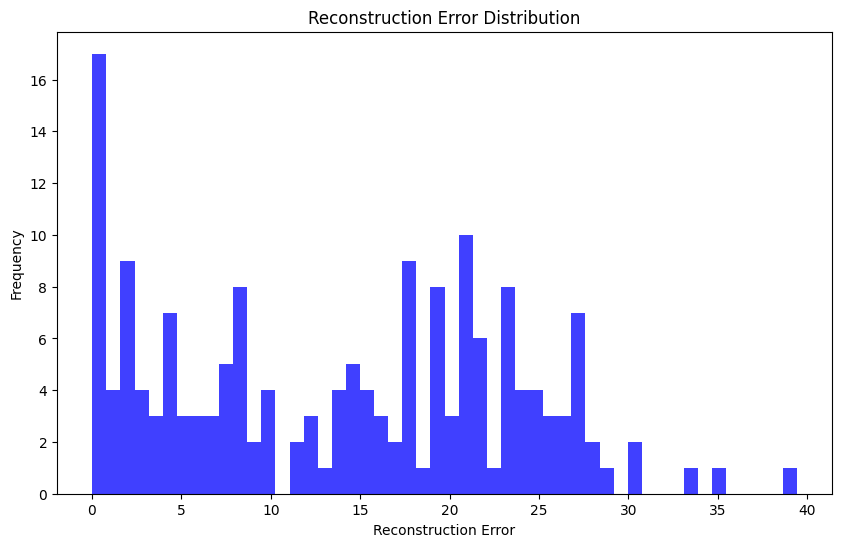

Number of anomalies detected: 171


In [16]:
# autoencoder on unlabelled data

# autoencoder and clustering for unlabeled data

import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to extract features from spectrogram
def extractFeaturesFromSpectrogram(imagePath, image_size=(224, 224)):
    if not os.path.exists(imagePath):
        print(f"Error: The file at {imagePath} does not exist.")
        return None
    
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Failed to load image from {imagePath}")
        return None
    
    resized_image = cv2.resize(image, image_size)
    return resized_image.flatten()  # Flatten to 1D array

def loadDataUnlabeled(imageFolder, image_size=(224, 224)):
    features = []
    imageFiles = [file for file in os.listdir(imageFolder) if file.endswith(".png")]
    for file in tqdm(imageFiles, desc="Processing Images"):
        filePath = os.path.join(imageFolder, file)
        feature = extractFeaturesFromSpectrogram(filePath, image_size=image_size)
        if feature is not None:
            features.append(feature)
    
    return np.array(features)

# Custom autoencoder using PCA
class AutoencoderPCA:
    def __init__(self, latent_dim):
        self.latent_dim = latent_dim
        self.encoder = PCA(n_components=latent_dim)
        self.scaler = MinMaxScaler()

    def fit(self, X):
        # Normalize data to range [0, 1] for better PCA performance
        X_scaled = self.scaler.fit_transform(X)
        
        # Fit PCA
        self.encoder.fit(X_scaled)
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        return self.encoder.transform(X_scaled)

def visualize_latent_space_unlabeled(encoded_data, title="Latent Space Visualization"):
    tsne = TSNE(n_components=2, random_state=123)
    reduced_data = tsne.fit_transform(encoded_data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=30, alpha=0.7, cmap='viridis')
    plt.title(title)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

if __name__ == "__main__":
    imageFolder = "unlabelledBinSpecImgs"  

    # Load the data
    X = loadDataUnlabeled(imageFolder)
    if X.shape[0] == 0:
        print("No valid data found. Exiting.")
        exit()
    
    # Initialize and train the autoencoder
    latentDim = 100  # Number of dimensions in the latent space
    autoencoder = AutoencoderPCA(latent_dim=latentDim)
    autoencoder.fit(X)
    
    # Transform data to latent space
    X_encoded = autoencoder.transform(X)

    # Clustering in latent space
    nClusters = 3  # Number of clusters
    kmeans = KMeans(n_clusters=nClusters, random_state=123)
    clusterLabels = kmeans.fit_predict(X_encoded)
    
    # Evaluate clustering quality
    silhouette = silhouette_score(X_encoded, clusterLabels)
    print(f"Silhouette Score: {silhouette:.2f}")

    # Visualize latent space with clusters
    tsne = TSNE(n_components=2, random_state=123)
    reducedData = tsne.fit_transform(X_encoded)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reducedData[:, 0], reducedData[:, 1], c=clusterLabels, cmap='viridis', s=30, alpha=0.7)
    plt.colorbar(scatter)
    plt.title("t-SNE Visualization of Clusters in Latent Space")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

    # Anomaly detection based on reconstruction error
    def detectAnomalies(autoencoder, data, threshold=0.01):
      # Scale data and encode it into the latent space
      dataScaled = autoencoder.scaler.transform(data)
      latentRepresentation = autoencoder.encoder.transform(dataScaled)
      
      # Reconstruct the data from latent space
      reconstructed_scaled = autoencoder.encoder.inverse_transform(latentRepresentation)
      reconstructed = autoencoder.scaler.inverse_transform(reconstructed_scaled)
      
      # Compute reconstruction errors
      reconstructionErrors = np.mean((data - reconstructed) ** 2, axis=1)
      
      # Identify anomalies based on threshold
      anomalies = reconstructionErrors > threshold
      return anomalies, reconstructionErrors

    anomalies, reconstructionErrors = detectAnomalies(autoencoder, X, threshold=0.01)
    
    # Plot reconstruction error distribution
    plt.figure(figsize=(10, 6))
    plt.hist(reconstructionErrors, bins=50, alpha=0.75, color='blue')
    plt.title("Reconstruction Error Distribution")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Frequency")
    plt.show()

    print(f"Number of anomalies detected: {np.sum(anomalies)}")



### t-SNE w/ OpenCV data

In [3]:
# CNN model

random.seed(123)
np.random.seed(123)
torch.manual_seed(123)
torch.cuda.manual_seed_all(123)

class SpectrogramDataset(Dataset):
    def __init__(self, imageFolder, img_size=(224, 224)):
        self.imageFolder = imageFolder
        self.img_size = img_size
        self.images = []
        self.labels = []
        self.label_encoder = LabelEncoder()
        
        self.loadData()

    def loadData(self):
        imageFiles = [file for file in os.listdir(self.imageFolder) if file.endswith(".png")]
        
        for file in tqdm(imageFiles, desc="Processing Images"):
            filePath = os.path.join(self.imageFolder, file)
            
            image = cv2.imread(filePath, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error loading image {filePath}")
                continue
            
            resizedImage = cv2.resize(image, self.img_size)
            self.images.append(resizedImage)
            
            label = self.getSpeciesLabel(file)
            self.labels.append(label)
        
        self.images = np.array(self.images)
        self.labels = self.label_encoder.fit_transform(self.labels)

    def getSpeciesLabel(self, fileName):
        return fileName.split('_')[0]


    # 'dunder' methods (basically just used to make the dataset compatible with PyTorch's DataLoader)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].astype('float32') / 255.0  # normalize image
        image = torch.tensor(image).unsqueeze(0)  
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label



class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  # Feature Layer
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        features = x  # Extract features from fc1
        x = self.dropout(x)
        x = self.fc2(x)
        return x, features  # Return both classification output & features



def trainModel(model, train_loader, val_loader, num_epochs):    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # learning rate

    for epoch in range(num_epochs):
        model.train()
        runningLoss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass (get only the predictions)
            outputs, _ = model(images)  # FIX: Extract only predictions
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            runningLoss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epochLoss = runningLoss / len(train_loader)
        epochAccuracy = 100 * correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epochLoss:.4f}, Accuracy: {epochAccuracy:.2f}%")

        model.eval()
        valCorrect = 0
        valTotal = 0
        allPreds = []
        allLabels = []
        with torch.no_grad():
            for images, labels in val_loader:
                outputs, _ = model(images)  # FIX: Extract only predictions
                _, predicted = torch.max(outputs, 1)
                valTotal += labels.size(0)
                valCorrect += (predicted == labels).sum().item()

                # Store predictions and labels
                allPreds.extend(predicted.cpu().numpy())
                allLabels.extend(labels.cpu().numpy())

        valAccuracy = 100 * valCorrect / valTotal
        print(f"Validation Accuracy: {valAccuracy:.2f}%")



if __name__ == "__main__":
    imageFolder = "processedSpectrogramImages"  # default = processedSpectrogramImages
    imgSize = (224, 224) 
    
    dataset = SpectrogramDataset(imageFolder, imgSize)
    trainSize = int(0.8 * len(dataset))
    valSize = len(dataset) - trainSize
    trainDataset, valDataset = random_split(dataset, [trainSize, valSize])
    
    trainLoader = DataLoader(trainDataset, batch_size=10, shuffle=True)
    valLoader = DataLoader(valDataset, batch_size=10, shuffle=False)
    
    numClasses = len(np.unique(dataset.labels))
    
    model = CNNModel(num_classes=numClasses)
    
    # decide number of epochs
    # on seed 123 the model seems to startt overfitting past epoch 5
    trainModel(model, trainLoader, valLoader, num_epochs=5)

    # to save the model
    torch.save(model.state_dict(), "Test_for_TSNE_cnn_grasshopper_cricket_classifier_15-02-2025.pth")


Processing Images: 100%|██████████| 964/964 [00:09<00:00, 102.09it/s]


Epoch 1/5, Loss: 0.9964, Accuracy: 70.69%
Validation Accuracy: 79.79%
Epoch 2/5, Loss: 0.3144, Accuracy: 91.31%
Validation Accuracy: 97.41%
Epoch 3/5, Loss: 0.2502, Accuracy: 92.48%
Validation Accuracy: 96.37%
Epoch 4/5, Loss: 0.1099, Accuracy: 96.50%
Validation Accuracy: 98.96%
Epoch 5/5, Loss: 0.0600, Accuracy: 97.92%
Validation Accuracy: 95.85%


C:\Users\Student\AppData\Local\Temp\ipykernel_13704\4293560092.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("Test_for_TSNE_cnn_grassh

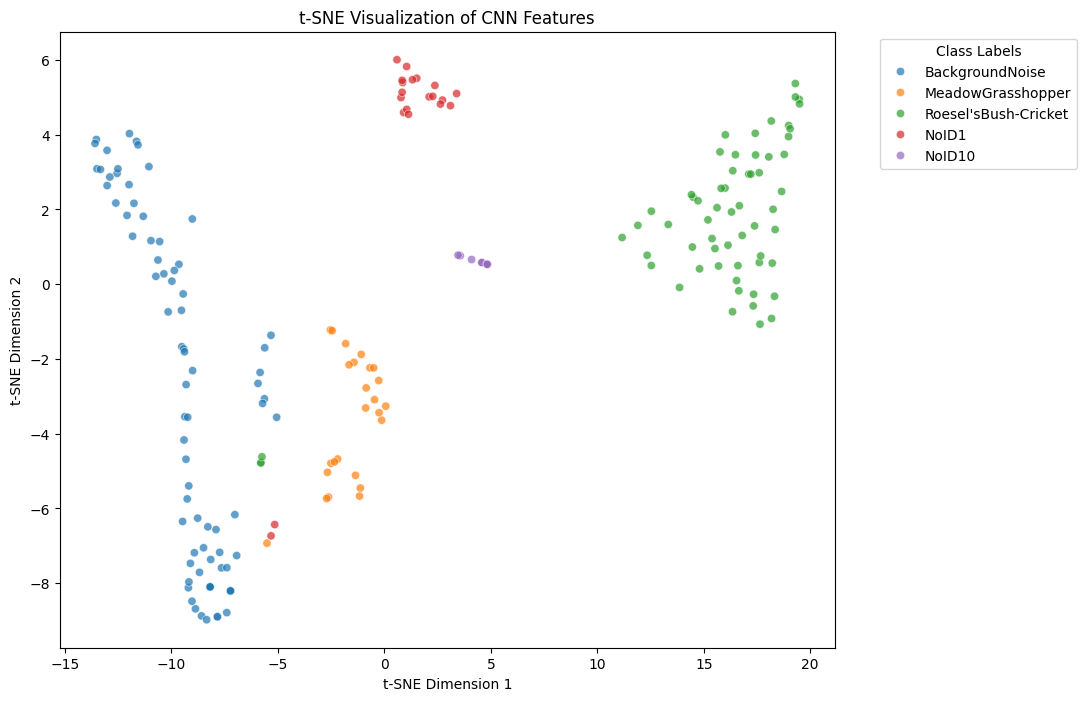

In [ ]:
# Load trained model
model.load_state_dict(torch.load("Test_for_TSNE_cnn_grasshopper_cricket_classifier_15-02-2025.pth"))
model.eval()

# Store features and labels
featuresList = []
labelsList = []

with torch.no_grad():
    for images, labels in valLoader:
        _, features = model(images)  # Get features from fc1
        featuresList.append(features.cpu().numpy())
        labelsList.append(labels.cpu().numpy())

# Convert lists to numpy arrays
featuresArray = np.vstack(featuresList)  # Shape (num_samples, 128)
labelsArray = np.hstack(labelsList)      # Shape (num_samples,)

# Apply t-SNE to reduce features to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=123)
features2D = tsne.fit_transform(featuresArray)

# Define class names in order of LabelEncoder transformation
classNames = ['BackgroundNoise', 'MeadowGrasshopper', 'NoID1', 'NoID10', "Roesel'sBush-Cricket"]

# Convert numerical labels to class names
labelNames = [classNames[label] for label in labelsArray]

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features2D[:, 0], y=features2D[:, 1], hue=labelNames, palette="tab10", alpha=0.7)

plt.title("t-SNE Visualization of CNN Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class Labels", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.show()


### t-SNE testing

In [2]:
# CNN model
rSeed = 123 #123 = default
random.seed(rSeed)
np.random.seed(rSeed)
torch.manual_seed(rSeed)
torch.cuda.manual_seed_all(rSeed)

class SpectrogramDataset(Dataset):
    def __init__(self, imageFolder, img_size=(224, 224)):
        self.imageFolder = imageFolder
        self.img_size = img_size
        self.images = []
        self.labels = []
        self.filenames = []  
        self.label_encoder = LabelEncoder()
        
        self.loadData()

    def loadData(self):
        imageFiles = [file for file in os.listdir(self.imageFolder) if file.endswith(".png")]
        
        for file in tqdm(imageFiles, desc="Processing Images"):
            filePath = os.path.join(self.imageFolder, file)
            
            image = cv2.imread(filePath, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error loading image {filePath}")
                continue
            
            resizedImage = cv2.resize(image, self.img_size)
            self.images.append(resizedImage)
            
            label = self.getSpeciesLabel(file)
            self.labels.append(label)
            self.filenames.append(file) 
        
        self.images = np.array(self.images)
        self.labels = self.label_encoder.fit_transform(self.labels)

    def getSpeciesLabel(self, fileName):
        return fileName.split('_')[0]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].astype('float32') / 255.0  # normalise image
        image = torch.tensor(image).unsqueeze(0)  
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label, self.filenames[idx]  # Return filename along with image and label



class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 128) 
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        features = x  
        x = self.dropout(x)
        x = self.fc2(x)
        return x, features  # Return both classification output & features



def trainModel(model, train_loader, val_loader, num_epochs):    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # learning rate

    for epoch in range(num_epochs):
        model.train()
        runningLoss = 0.0
        correct = 0
        total = 0

        for images, labels, filenames in train_loader:  
            optimizer.zero_grad()

            outputs, _ = model(images)  
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            runningLoss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epochLoss = runningLoss / len(train_loader)
        epochAccuracy = 100 * correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epochLoss:.4f}, Accuracy: {epochAccuracy:.2f}%")

        model.eval()
        valCorrect = 0
        valTotal = 0
        allPreds = []
        allLabels = []
        with torch.no_grad():
            for images, labels, filenames in val_loader:  
                outputs, _ = model(images)  
                _, predicted = torch.max(outputs, 1)
                valTotal += labels.size(0)
                valCorrect += (predicted == labels).sum().item()

                # Store predictions and labels
                allPreds.extend(predicted.cpu().numpy())
                allLabels.extend(labels.cpu().numpy())

        valAccuracy = 100 * valCorrect / valTotal
        print(f"Validation Accuracy: {valAccuracy:.2f}%")




if __name__ == "__main__":
    imageFolder = "processedSpectrogramImages"  # default = processedSpectrogramImages
    imgSize = (224, 224) 
    
    dataset = SpectrogramDataset(imageFolder, imgSize)
    trainSize = int(0.8 * len(dataset))
    valSize = len(dataset) - trainSize
    trainDataset, valDataset = random_split(dataset, [trainSize, valSize])
    
    trainLoader = DataLoader(trainDataset, batch_size=10, shuffle=True)
    valLoader = DataLoader(valDataset, batch_size=10, shuffle=False)
    
    numClasses = len(np.unique(dataset.labels))
    
    model = CNNModel(num_classes=numClasses)
    
    # decide number of epochs
    trainModel(model, trainLoader, valLoader, num_epochs=10)

    torch.save(model.state_dict(), "Test_for_TSNE_cnn_grasshopper_cricket_classifier.pth")


Processing Images: 100%|██████████| 1685/1685 [00:06<00:00, 240.88it/s]


Epoch 1/10, Loss: 0.4843, Accuracy: 84.79%
Validation Accuracy: 97.92%
Epoch 2/10, Loss: 0.1007, Accuracy: 97.18%
Validation Accuracy: 95.25%
Epoch 3/10, Loss: 0.0633, Accuracy: 98.37%
Validation Accuracy: 99.70%
Epoch 4/10, Loss: 0.0587, Accuracy: 98.44%
Validation Accuracy: 99.70%
Epoch 5/10, Loss: 0.0604, Accuracy: 98.29%
Validation Accuracy: 96.74%
Epoch 6/10, Loss: 0.0580, Accuracy: 98.37%
Validation Accuracy: 100.00%
Epoch 7/10, Loss: 0.0296, Accuracy: 99.11%
Validation Accuracy: 100.00%
Epoch 8/10, Loss: 0.0281, Accuracy: 99.11%
Validation Accuracy: 99.70%
Epoch 9/10, Loss: 0.0285, Accuracy: 99.26%
Validation Accuracy: 100.00%
Epoch 10/10, Loss: 0.0336, Accuracy: 99.18%
Validation Accuracy: 99.70%


106


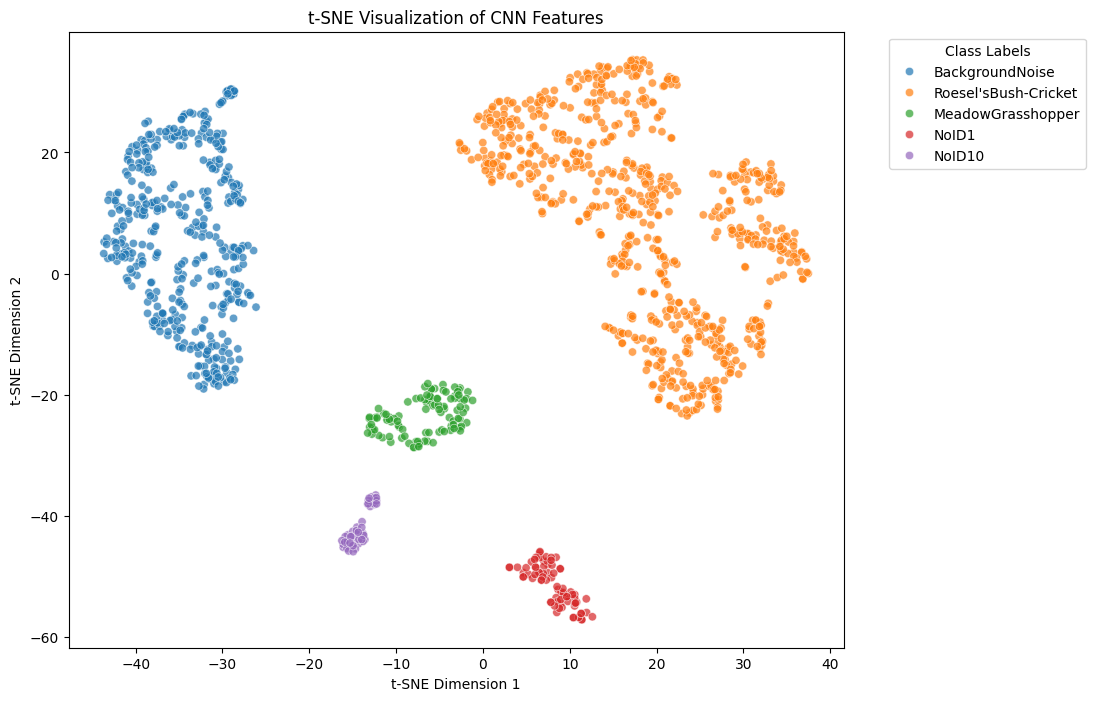

In [3]:
# Store features, labels, and filenames
featuresList = []
labelsList = []
filenamesList = []  

with torch.no_grad():
    for images, labels, filenames in trainLoader:
        _, features = model(images)  # Get features from fc1
        featuresList.append(features.cpu().numpy())
        labelsList.append(labels.cpu().numpy())
        filenamesList.extend(filenames)  # Store filenames
        
featuresArray = np.vstack(featuresList)  
labelsArray = np.hstack(labelsList)     
filenamesArray = np.array(filenamesList) 

tsne = TSNE(n_components=2, perplexity=30, random_state=123)
features2D = tsne.fit_transform(featuresArray)

classNames = ['BackgroundNoise', 'MeadowGrasshopper', 'NoID1', 'NoID10', "Roesel'sBush-Cricket"]

labelNames = [classNames[label] for label in labelsArray]

# Specify which class to show filenames for 
targetClass = "MeadowGrasshopper"

plt.figure(figsize=(10, 8))
sns.scatterplot(x=features2D[:, 0], y=features2D[:, 1], hue=labelNames, palette="tab10", alpha=0.7)
count = 0   
for i, (filename, label) in enumerate(zip(filenamesArray, labelsArray)):
    if classNames[label] == targetClass:  
        count += 1                  # used to reduce number of filenames shown for the sake of visibility
        if count % 2000 == 0:
            plt.text(features2D[i, 0], features2D[i, 1], filename, fontsize=8, alpha=0.7)
print(count)
plt.title("t-SNE Visualization of CNN Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class Labels", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.show()
